# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:43:52.081584: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:43:55.002814
2025-04-14 23:43:55.002814


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:43:50"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

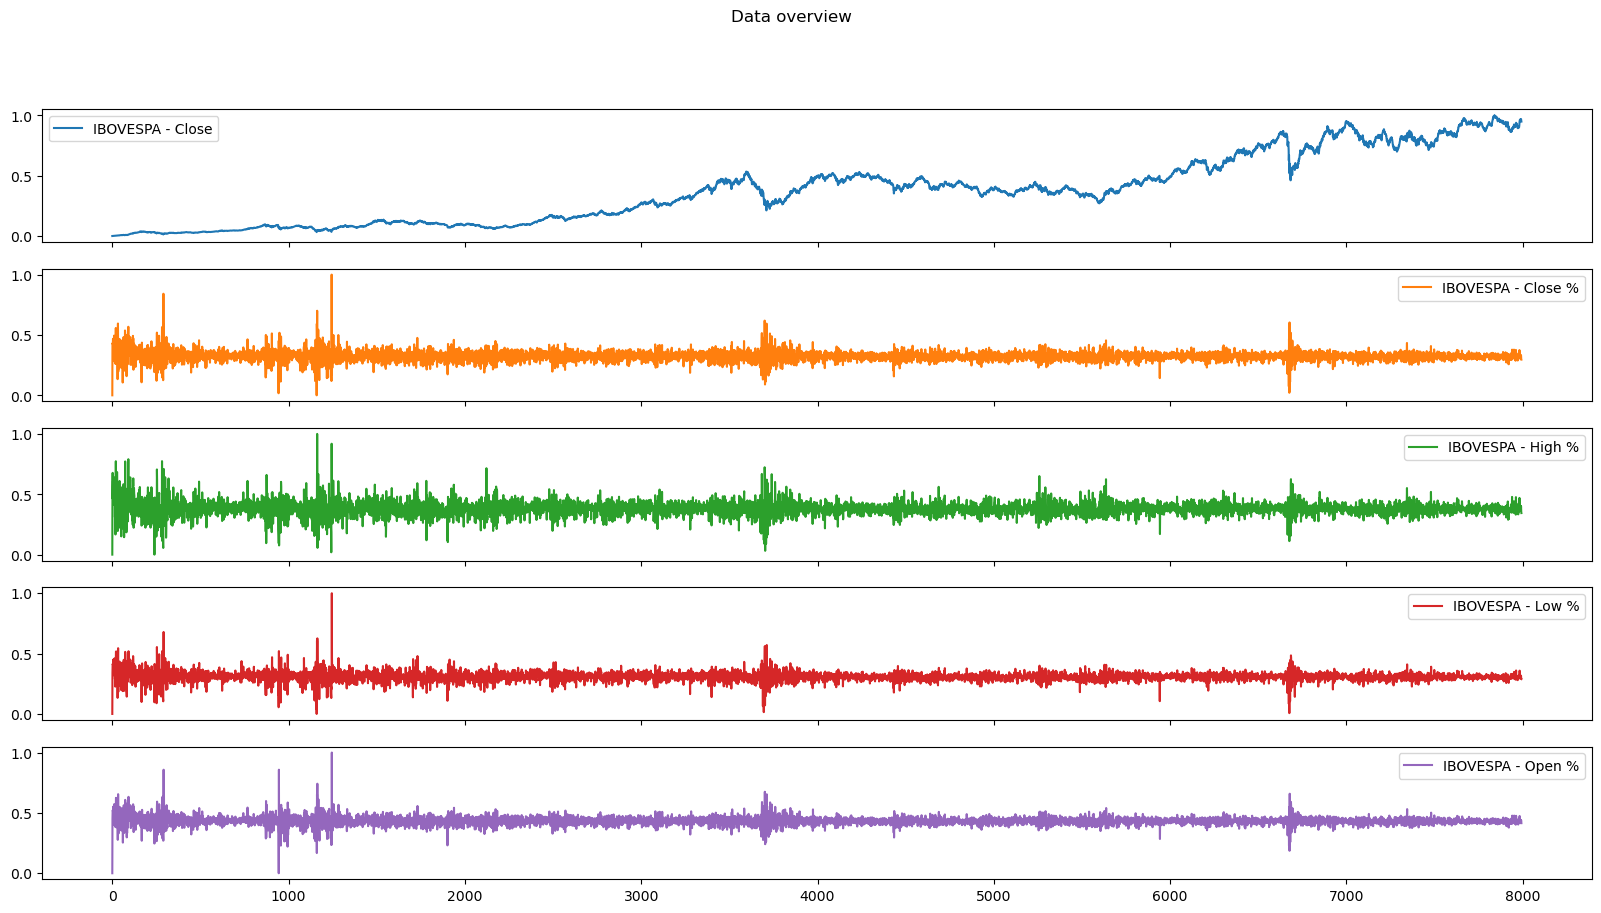

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

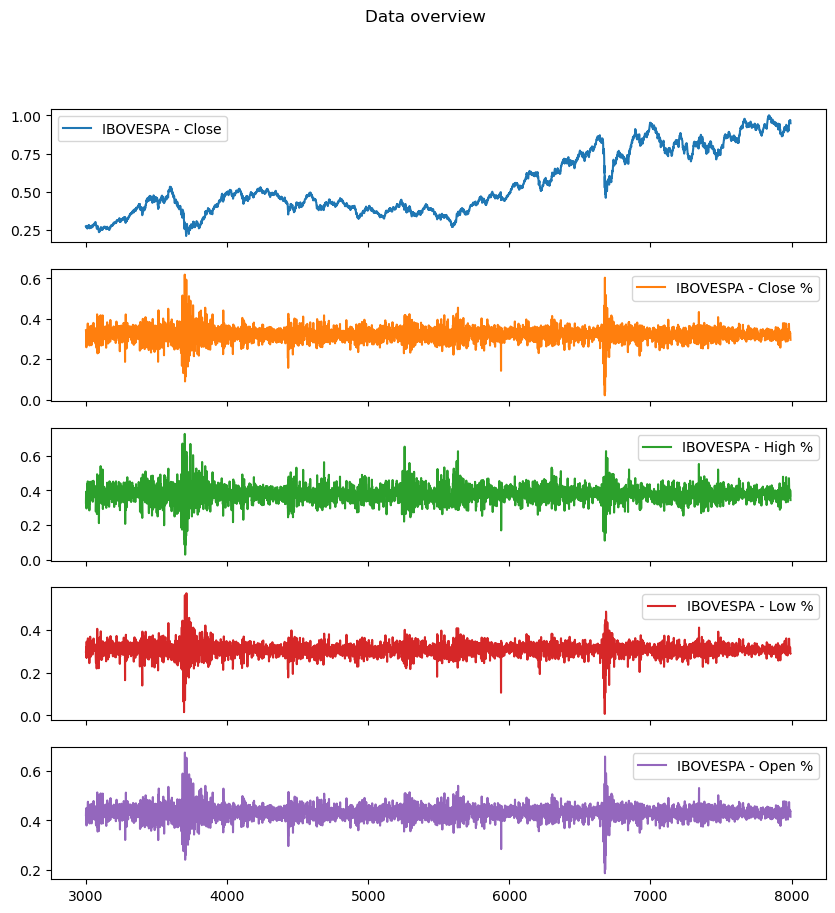

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

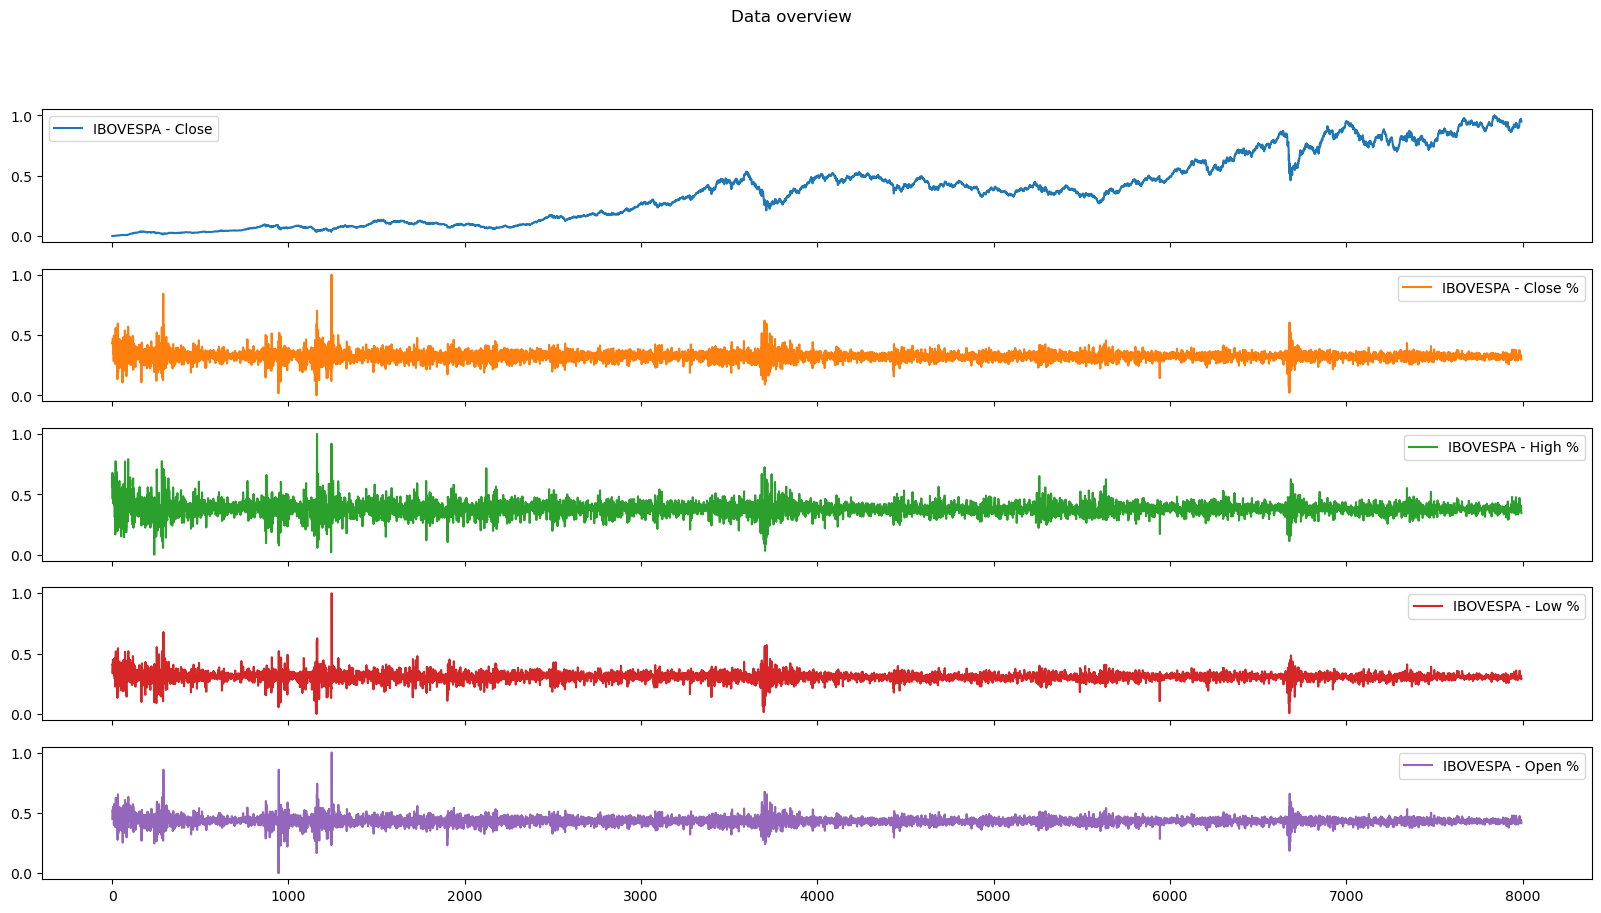

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

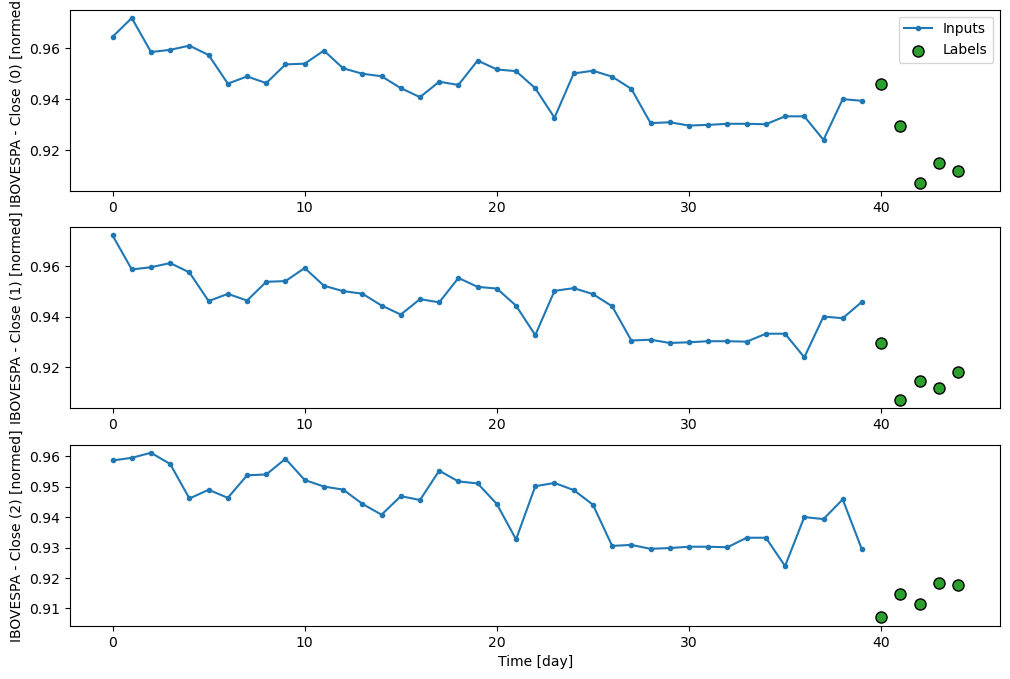

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8:32 2s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 121.6969 - mean_squared_error: 2.7976e-04 - root_mean_squared_error: 0.0161

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 103.9550 - mean_squared_error: 2.7962e-04 - root_mean_squared_error: 0.0163

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 93.5798 - mean_squared_error: 2.6805e-04 - root_mean_squared_error: 0.0161 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 85.1092 - mean_squared_error: 2.5122e-04 - root_mean_squared_error: 0.0156

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 77.9705 - mean_squared_error: 2.3401e-04 - root_mean_squared_error: 0.0151

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.2383 - mean_squared_error: 2.2169e-04 - root_mean_squared_error: 0.0146

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.7612 - mean_squared_error: 2.2001e-04 - root_mean_squared_error: 0.0146

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 64.2841 - mean_squared_error: 2.2759e-04 - root_mean_squared_error: 0.0149

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.3131 - mean_squared_error: 2.3219e-04 - root_mean_squared_error: 0.0151

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.8066 - mean_squared_error: 2.3626e-04 - root_mean_squared_error: 0.0152

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.6902 - mean_squared_error: 2.4228e-04 - root_mean_squared_error: 0.0154

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.8497 - mean_squared_error: 2.5141e-04 - root_mean_squared_error: 0.0157

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.1584 - mean_squared_error: 2.5880e-04 - root_mean_squared_error: 0.0159

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 51.5901 - mean_squared_error: 2.6438e-04 - root_mean_squared_error: 0.0161

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 50.1625 - mean_squared_error: 2.6907e-04 - root_mean_squared_error: 0.0162

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 48.8339 - mean_squared_error: 2.7242e-04 - root_mean_squared_error: 0.0163

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 47.6125 - mean_squared_error: 2.7476e-04 - root_mean_squared_error: 0.0164

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 46.4997 - mean_squared_error: 2.7689e-04 - root_mean_squared_error: 0.0165

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 45.5028 - mean_squared_error: 2.8125e-04 - root_mean_squared_error: 0.0166

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 44.5915 - mean_squared_error: 2.8777e-04 - root_mean_squared_error: 0.0168

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 43.7286 - mean_squared_error: 2.9361e-04 - root_mean_squared_error: 0.0170

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 42.9067 - mean_squared_error: 2.9879e-04 - root_mean_squared_error: 0.0171

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 42.1238 - mean_squared_error: 3.0375e-04 - root_mean_squared_error: 0.0172

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 41.3864 - mean_squared_error: 3.1030e-04 - root_mean_squared_error: 0.0174

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 40.8647 - mean_squared_error: 3.1717e-04 - root_mean_squared_error: 0.0176

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 40.5270 - mean_squared_error: 3.2176e-04 - root_mean_squared_error: 0.0177

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 39.8817 - mean_squared_error: 3.3434e-04 - root_mean_squared_error: 0.0180

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 39.2674 - mean_squared_error: 3.4919e-04 - root_mean_squared_error: 0.0183

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 38.6799 - mean_squared_error: 3.6524e-04 - root_mean_squared_error: 0.0187

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 38.1447 - mean_squared_error: 3.9244e-04 - root_mean_squared_error: 0.0192

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 37.6427 - mean_squared_error: 4.2344e-04 - root_mean_squared_error: 0.0198

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 37.1856 - mean_squared_error: 4.7992e-04 - root_mean_squared_error: 0.0206

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 36.7679 - mean_squared_error: 5.5974e-04 - root_mean_squared_error: 0.0217

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 36.3725 - mean_squared_error: 6.4246e-04 - root_mean_squared_error: 0.0228

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 35.9930 - mean_squared_error: 7.2256e-04 - root_mean_squared_error: 0.0238

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 35.6334 - mean_squared_error: 8.0260e-04 - root_mean_squared_error: 0.0248

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 35.2816 - mean_squared_error: 8.7669e-04 - root_mean_squared_error: 0.0258

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 34.9365 - mean_squared_error: 9.4491e-04 - root_mean_squared_error: 0.0267

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 34.5994 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0275    

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 34.2727 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0282

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 33.9542 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 33.6455 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 33.3426 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 33.0494 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 32.7665 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 32.4922 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 32.2287 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 32.0375 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 31.7907 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 31.5487 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 31.3099 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 31.0739 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 30.8437 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 30.6242 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 30.4097 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 30.2006 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 29.9950 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 29.7928 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0381

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 29.5931 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 29.3966 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 29.3484 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391 - val_loss: 0.1049 - val_mean_absolute_error: 0.1049 - val_mean_absolute_percentage_error: 11.1510 - val_mean_squared_error: 0.0117 - val_root_mean_squared_error: 0.1082 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.7278 - mean_absolute_error: 0.7278 - mean_absolute_percentage_error: 9667.4141 - mean_squared_error: 0.5298 - root_mean_squared_error: 0.7279

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.7277 - mean_absolute_error: 0.7277 - mean_absolute_percentage_error: 7403.3018 - mean_squared_error: 0.5296 - root_mean_squared_error: 0.7277 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7233 - mean_absolute_error: 0.7233 - mean_absolute_percentage_error: 6434.6504 - mean_squared_error: 0.5233 - root_mean_squared_error: 0.7234

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7145 - mean_absolute_error: 0.7145 - mean_absolute_percentage_error: 5599.8994 - mean_squared_error: 0.5111 - root_mean_squared_error: 0.7148

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.7026 - mean_absolute_error: 0.7026 - mean_absolute_percentage_error: 5081.9004 - mean_squared_error: 0.4955 - root_mean_squared_error: 0.7035

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.6864 - mean_absolute_error: 0.6864 - mean_absolute_percentage_error: 4687.2295 - mean_squared_error: 0.4759 - root_mean_squared_error: 0.6889

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.6720 - mean_absolute_error: 0.6720 - mean_absolute_percentage_error: 4374.9014 - mean_squared_error: 0.4653 - root_mean_squared_error: 0.6809

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6581 - mean_absolute_error: 0.6581 - mean_absolute_percentage_error: 4115.1753 - mean_squared_error: 0.4564 - root_mean_squared_error: 0.6744

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6417 - mean_absolute_error: 0.6417 - mean_absolute_percentage_error: 3885.4492 - mean_squared_error: 0.4439 - root_mean_squared_error: 0.6647

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6233 - mean_absolute_error: 0.6233 - mean_absolute_percentage_error: 3679.1941 - mean_squared_error: 0.4297 - root_mean_squared_error: 0.6533

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6047 - mean_absolute_error: 0.6047 - mean_absolute_percentage_error: 3494.4358 - mean_squared_error: 0.4152 - root_mean_squared_error: 0.6413

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5861 - mean_absolute_error: 0.5861 - mean_absolute_percentage_error: 3328.1812 - mean_squared_error: 0.4010 - root_mean_squared_error: 0.6292

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.5682 - mean_absolute_error: 0.5682 - mean_absolute_percentage_error: 3178.4431 - mean_squared_error: 0.3872 - root_mean_squared_error: 0.6173

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.5510 - mean_absolute_error: 0.5510 - mean_absolute_percentage_error: 3042.8108 - mean_squared_error: 0.3742 - root_mean_squared_error: 0.6057

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5348 - mean_absolute_error: 0.5348 - mean_absolute_percentage_error: 2919.4946 - mean_squared_error: 0.3619 - root_mean_squared_error: 0.5946

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5193 - mean_absolute_error: 0.5193 - mean_absolute_percentage_error: 2806.7478 - mean_squared_error: 0.3504 - root_mean_squared_error: 0.5839

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.5046 - mean_absolute_error: 0.5046 - mean_absolute_percentage_error: 2703.2397 - mean_squared_error: 0.3395 - root_mean_squared_error: 0.5736

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 2607.9033 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5638

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4818 - mean_absolute_error: 0.4818 - mean_absolute_percentage_error: 2548.4053 - mean_squared_error: 0.3228 - root_mean_squared_error: 0.5575

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4650 - mean_absolute_error: 0.4650 - mean_absolute_percentage_error: 2438.1272 - mean_squared_error: 0.3106 - root_mean_squared_error: 0.5455

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4533 - mean_absolute_error: 0.4533 - mean_absolute_percentage_error: 2362.2292 - mean_squared_error: 0.3021 - root_mean_squared_error: 0.5370

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4422 - mean_absolute_error: 0.4422 - mean_absolute_percentage_error: 2291.4819 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5289

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4316 - mean_absolute_error: 0.4316 - mean_absolute_percentage_error: 2225.3528 - mean_squared_error: 0.2865 - root_mean_squared_error: 0.5211

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 2143.6145 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.5112

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4090 - mean_absolute_error: 0.4090 - mean_absolute_percentage_error: 2086.6436 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.5041

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.4001 - mean_absolute_error: 0.4001 - mean_absolute_percentage_error: 2032.9838 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4973

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 1982.3491 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4908

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 1919.1283 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4826

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3735 - mean_absolute_error: 0.3735 - mean_absolute_percentage_error: 1874.6234 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4766

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 1832.3918 - mean_squared_error: 0.2402 - root_mean_squared_error: 0.4709

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 1779.3090 - mean_squared_error: 0.2338 - root_mean_squared_error: 0.4636

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 1741.7174 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4584

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1705.8855 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4533

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 1671.6788 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4484

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1649.7231 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4453

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1628.4127 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4422

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 1597.5950 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4376

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1568.0676 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4333

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1539.7592 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4291

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1512.6323 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4250

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1495.1582 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4224

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1469.7909 - mean_squared_error: 0.1958 - root_mean_squared_error: 0.4187

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1445.3783 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4150

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1421.8666 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4114

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1399.2034 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.4079

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 1377.3395 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4045

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1356.2343 - mean_squared_error: 0.1818 - root_mean_squared_error: 0.4012

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1349.3623 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.4002

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1342.5693 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3991

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1329.2129 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3970

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1309.7300 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3939

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1297.0948 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3919

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1284.7308 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3899

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1278.6479 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3889

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1266.6743 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3870

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1254.9509 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3850

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1232.2205 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3813

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1210.3969 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3777

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2573 - mean_absolute_error: 0.2573 - mean_absolute_percentage_error: 1189.4260 - mean_squared_error: 0.1609 - root_mean_squared_error: 0.3742

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1169.2545 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3707

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1149.8395 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3674

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1131.1383 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3642

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1117.5565 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3618

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1104.3396 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3595

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1087.2573 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3565

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1074.8330 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3543

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1062.7251 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3522

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2335 - mean_absolute_error: 0.2335 - mean_absolute_percentage_error: 1050.9191 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3501

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1035.6270 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3474

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1020.8243 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3447

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1006.4896 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3421

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 996.0353 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3402 

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 985.8221 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3383

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 975.8420 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3365

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 966.0866 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3347

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 953.4142 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3324

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 944.1514 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3306

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 935.0878 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3289

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 929.1525 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3278

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 920.4061 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3262

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 914.6878 - mean_squared_error: 0.1258 - root_mean_squared_error: 0.3251 - val_loss: 0.0899 - val_mean_absolute_error: 0.0899 - val_mean_absolute_percentage_error: 9.5390 - val_mean_squared_error: 0.0087 - val_root_mean_squared_error: 0.0933 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.7059 - mean_absolute_error: 0.7059 - mean_absolute_percentage_error: 9372.5898 - mean_squared_error: 0.4984 - root_mean_squared_error: 0.7060

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7045 - mean_absolute_error: 0.7045 - mean_absolute_percentage_error: 7815.0659 - mean_squared_error: 0.4964 - root_mean_squared_error: 0.7046 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7011 - mean_absolute_error: 0.7011 - mean_absolute_percentage_error: 6638.7627 - mean_squared_error: 0.4918 - root_mean_squared_error: 0.7013

  8/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.6947 - mean_absolute_error: 0.6947 - mean_absolute_percentage_error: 5634.4824 - mean_squared_error: 0.4829 - root_mean_squared_error: 0.6949

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.6892 - mean_absolute_error: 0.6892 - mean_absolute_percentage_error: 5236.9673 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.6860 - mean_absolute_error: 0.6860 - mean_absolute_percentage_error: 5074.7480 - mean_squared_error: 0.4715 - root_mean_squared_error: 0.6865

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6749 - mean_absolute_error: 0.6749 - mean_absolute_percentage_error: 4672.9458 - mean_squared_error: 0.4576 - root_mean_squared_error: 0.6760

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6662 - mean_absolute_error: 0.6662 - mean_absolute_percentage_error: 4453.7588 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.6680

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6516 - mean_absolute_error: 0.6516 - mean_absolute_percentage_error: 4170.0933 - mean_squared_error: 0.4306 - root_mean_squared_error: 0.6549

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6351 - mean_absolute_error: 0.6351 - mean_absolute_percentage_error: 3924.0342 - mean_squared_error: 0.4134 - root_mean_squared_error: 0.6408

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6163 - mean_absolute_error: 0.6163 - mean_absolute_percentage_error: 3704.9636 - mean_squared_error: 0.3960 - root_mean_squared_error: 0.6260

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5971 - mean_absolute_error: 0.5971 - mean_absolute_percentage_error: 3509.2793 - mean_squared_error: 0.3792 - root_mean_squared_error: 0.6114

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5783 - mean_absolute_error: 0.5783 - mean_absolute_percentage_error: 3334.5513 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.5973

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5540 - mean_absolute_error: 0.5540 - mean_absolute_percentage_error: 3128.5925 - mean_squared_error: 0.3442 - root_mean_squared_error: 0.5794

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5315 - mean_absolute_error: 0.5315 - mean_absolute_percentage_error: 2949.7402 - mean_squared_error: 0.3268 - root_mean_squared_error: 0.5628

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5156 - mean_absolute_error: 0.5156 - mean_absolute_percentage_error: 2829.9033 - mean_squared_error: 0.3149 - root_mean_squared_error: 0.5512

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5006 - mean_absolute_error: 0.5006 - mean_absolute_percentage_error: 2720.3958 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5402

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4866 - mean_absolute_error: 0.4866 - mean_absolute_percentage_error: 2620.0544 - mean_squared_error: 0.2935 - root_mean_squared_error: 0.5297

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4690 - mean_absolute_error: 0.4690 - mean_absolute_percentage_error: 2498.4834 - mean_squared_error: 0.2810 - root_mean_squared_error: 0.5167

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4528 - mean_absolute_error: 0.4528 - mean_absolute_percentage_error: 2388.9734 - mean_squared_error: 0.2695 - root_mean_squared_error: 0.5046

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.4378 - mean_absolute_error: 0.4378 - mean_absolute_percentage_error: 2289.8374 - mean_squared_error: 0.2590 - root_mean_squared_error: 0.4933

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4239 - mean_absolute_error: 0.4239 - mean_absolute_percentage_error: 2199.5710 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4828

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 2136.9641 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4753

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 2059.4697 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4659

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3900 - mean_absolute_error: 0.3900 - mean_absolute_percentage_error: 1988.0526 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4570

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 1954.3971 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4527

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 1906.2637 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4466

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 1890.8130 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4446

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.3689 - mean_absolute_error: 0.3689 - mean_absolute_percentage_error: 1860.7487 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4407

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1803.7418 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4332

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 1763.5049 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4278

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1725.2485 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4226

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1688.8263 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4176

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1654.0962 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4128

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1620.9382 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4082

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 1589.2472 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4037

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1558.9269 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3994

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1529.8846 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3953

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1502.0389 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3912

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1475.3429 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3874

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1449.7260 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3836

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1425.1017 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3800

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1393.6976 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3754

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1371.1470 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3720

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1356.5641 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3698

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1335.3319 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3666

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1314.8358 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3635

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1288.5911 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3595

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1263.4985 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3556

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1239.4797 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3518

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1216.4645 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3482

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1194.3889 - mean_squared_error: 0.1390 - root_mean_squared_error: 0.3447

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1173.1948 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3413

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1152.8298 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3379

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1133.2419 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3347

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1114.3892 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3316

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1100.7073 - mean_squared_error: 0.1284 - root_mean_squared_error: 0.3294

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1087.3978 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3271

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1070.2075 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3242

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2297 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 1053.6202 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3214

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1037.6039 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3187

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 1022.1254 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3161

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1007.1547 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3135

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 992.6660 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3110 

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 978.6364 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3085

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 965.0483 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3062

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 951.8771 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3039

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 939.1036 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3016

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 926.7085 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2994

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 914.6740 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2973

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 902.9839 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.2952

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 891.6227 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2931

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 886.0717 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2921 - val_loss: 0.0394 - val_mean_absolute_error: 0.0394 - val_mean_absolute_percentage_error: 4.1527 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0442 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.4955 - mean_absolute_error: 0.4955 - mean_absolute_percentage_error: 6581.0244 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4955

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 4655.0752 - mean_squared_error: 0.2409 - root_mean_squared_error: 0.4908

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4836 - mean_absolute_error: 0.4836 - mean_absolute_percentage_error: 3797.9045 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4838

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - mean_absolute_percentage_error: 3359.3547 - mean_squared_error: 0.2260 - root_mean_squared_error: 0.4751

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 3051.7483 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4643

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4481 - mean_absolute_error: 0.4481 - mean_absolute_percentage_error: 2804.5974 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4515

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4302 - mean_absolute_error: 0.4302 - mean_absolute_percentage_error: 2594.0469 - mean_squared_error: 0.1935 - root_mean_squared_error: 0.4376

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 2413.8293 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.4240

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 2258.0808 - mean_squared_error: 0.1727 - root_mean_squared_error: 0.4110

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3774 - mean_absolute_error: 0.3774 - mean_absolute_percentage_error: 2122.6477 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3988

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 2004.1835 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3875

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3508 - mean_absolute_error: 0.3508 - mean_absolute_percentage_error: 1924.5845 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3796

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1851.6936 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3721

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3275 - mean_absolute_error: 0.3275 - mean_absolute_percentage_error: 1763.5817 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3628

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1684.3647 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3541

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1612.7573 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3460

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1547.7039 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3385

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1488.3065 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3314

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1433.8531 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3248

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1383.7217 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3185

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1337.3887 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.3126

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1294.4484 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.3071

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1254.5128 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.3018

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1217.2622 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2968

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1182.4209 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2921

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1149.7625 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2876

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1119.0754 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2833

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1090.1830 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2792

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1062.9237 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2753

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1037.1616 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2715

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 1012.7878 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2680

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 989.6762 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2646 

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 967.7338 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2613

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 946.8644 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2582

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 926.9843 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2551

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 908.0276 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2522

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 894.3749 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2501

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 876.8736 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2474

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 860.1254 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2448

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 844.0813 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2422

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 828.6976 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2398

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 813.9316 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2374

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 799.7459 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2351

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1662 - mean_absolute_error: 0.1662 - mean_absolute_percentage_error: 786.1038 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2328

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 772.9760 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2307

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 760.3331 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2286

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 748.1475 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2265

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 736.3940 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2245

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 725.0469 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2226

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 714.0846 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2207

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 703.4875 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2189

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 693.2379 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2171

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 683.3170 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2154

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 673.7101 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2137

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 664.4013 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2120

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 655.3774 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2105

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 646.6244 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2089

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 638.1307 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2074

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 629.8835 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2059

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 621.8718 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2045

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 614.0920 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2031 - val_loss: 0.0133 - val_mean_absolute_error: 0.0133 - val_mean_absolute_percentage_error: 1.4263 - val_mean_squared_error: 2.8582e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 4485.0947 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3380

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 3166.4729 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3332 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 2572.0955 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3258

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 2258.3462 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.3166

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 2030.5801 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.3053

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1845.0405 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2931

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1694.2427 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2817

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1567.9315 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2713

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1460.8987 - mean_squared_error: 0.0710 - root_mean_squared_error: 0.2618

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1369.0609 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2531

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1289.5133 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2453

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1236.4297 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2398

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 1188.0234 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2347

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1129.7692 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2284

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 1077.6118 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2226

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 1030.6267 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2172

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1802 - mean_absolute_error: 0.1802 - mean_absolute_percentage_error: 988.0666 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2123 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 949.2994 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2076

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 913.8374 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2033

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 881.2501 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1992

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 851.1831 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1953

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 823.3580 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1917

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 797.5163 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1883

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 773.4402 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1851

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 750.9462 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1821

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 729.8808 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1792

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 710.1050 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1764

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 691.4995 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1738

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 673.9604 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1713

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 657.3947 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1689

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 641.7232 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1666

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 626.8712 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1644

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 612.7722 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1623

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 599.3680 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1603

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 586.6058 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1583

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 574.4393 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1565

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 562.8265 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1547

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 551.7286 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1529

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 541.1104 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1512

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 530.9402 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1496

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 521.1892 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1481

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 511.8310 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1465

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 502.8420 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1451

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 494.1995 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1437

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 485.8832 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1423

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 477.8757 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1409

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 470.1588 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1396

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 462.7161 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1384

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 455.5322 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1372

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 448.5934 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1360

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 443.5424 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1351

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 437.0022 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1340

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 430.6735 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1329

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 424.5467 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1318

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 418.6117 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1307

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 412.8592 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1297

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 407.2805 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1287

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 401.8678 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1278

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 396.6134 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1268

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 391.5102 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1259

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 386.5561 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1250 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261 - val_mean_absolute_percentage_error: 2.7632 - val_mean_squared_error: 9.1332e-04 - val_root_mean_squared_error: 0.0302 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 2356.1091 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1777

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 1648.1782 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1715

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 1313.4578 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1622

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 1118.2333 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1520

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1364 - mean_absolute_error: 0.1364 - mean_absolute_percentage_error: 980.7998 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1428 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 880.2286 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1354

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 800.4689 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1289

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 735.4996 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1233

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 681.4468 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1183

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 635.7895 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1139

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 596.6566 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1100

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 562.6129 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1065

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 532.6946 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1033

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 506.1765 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1004

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 482.4973 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0977

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 461.2203 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0953

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 441.9800 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0930

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 424.4942 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0909

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 408.5170 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0889

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 393.8438 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0871

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 380.3188 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0854

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 367.8064 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0838

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 356.1917 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0823

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 345.3765 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0808

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 335.2780 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0795

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 328.1307 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0785

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 319.1180 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0773

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 310.6469 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0761

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 302.6685 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0750

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 295.1401 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0739

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 288.0242 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0729

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 281.2853 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0719

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 274.8927 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0710

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 268.8199 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0701

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 263.0417 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0693

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 257.5367 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0685

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 252.2852 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0677

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 247.2690 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0670

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 242.4715 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 237.8782 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0655

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 233.4757 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0649

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 229.2521 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0642

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 225.1970 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 221.2993 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0630

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 217.5501 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0624

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 213.9408 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0618

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 210.4632 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0612

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 207.1099 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0607

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 203.8741 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0602

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 200.7495 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0597

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 197.7303 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 194.8110 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0587

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 191.9866 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0582

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 189.2531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0578

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 186.6055 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0573

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 184.0395 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0569

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 181.5515 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0565

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 179.1377 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0561

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 176.7947 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0557

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 174.5195 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0554

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 173.4081 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0552 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1532 - val_mean_squared_error: 1.9765e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1296 - mean_absolute_error: 0.1296 - mean_absolute_percentage_error: 1720.4482 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1302

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 1195.9878 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1240

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 939.9108 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1148 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 787.8317 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1059

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 688.4724 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0991

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 615.9911 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0937

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 559.2220 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0891

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 513.2493 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0851

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 475.1172 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0816

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 442.9988 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0785

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 415.5726 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0758

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 391.7896 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0734

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 370.9013 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 352.3905 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0691

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 335.8612 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0673

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 321.0060 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0656

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 307.5912 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0640

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 295.4239 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0626

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 284.3261 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 274.1416 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0600

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 264.7556 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 256.0759 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 248.0209 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 240.5209 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0557

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 233.5178 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0548

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 226.9610 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0539

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 220.8068 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 215.0186 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 209.5636 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 204.4145 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 199.5445 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0501

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 194.9294 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 190.5487 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 186.3844 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 182.4197 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 178.6409 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 175.0346 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 171.5887 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 168.2919 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 165.9114 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 162.8525 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 159.9179 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0444

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 157.1006 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 154.3926 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 151.7879 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 149.2806 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 146.8648 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 144.5355 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 142.2877 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 140.1173 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 138.0202 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 135.9925 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 134.0307 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 132.1321 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 130.2930 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 128.5106 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 126.7822 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 125.1054 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 123.4778 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 121.8971 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 121.1250 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0825 - val_mean_squared_error: 1.7317e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 1618.4509 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1226

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 1122.5858 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1164

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 880.1278 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1074 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 736.4528 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0989

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 642.9477 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0925

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 574.6974 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0873

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 521.3959 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0830

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 478.2950 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0792

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 442.5798 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0759

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 412.5239 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0731

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 386.8743 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0705

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 364.6508 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0682

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 345.1443 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 327.8660 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0643

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 312.4438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0625

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 301.9180 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 289.0950 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 277.4822 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 266.9048 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 257.2165 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 248.2979 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 240.0596 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 232.4226 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 225.3173 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 218.6872 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 212.4851 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 206.6680 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 201.2001 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 196.0502 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 191.1910 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 186.5987 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 182.2496 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 178.1238 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 174.2034 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 170.4725 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 166.9178 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 163.5269 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 160.2879 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 157.1899 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 154.2239 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 151.3810 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 148.6537 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 146.0353 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 143.5186 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 141.0980 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 138.7683 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 136.5239 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 134.3600 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 132.2720 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 130.2560 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 128.3080 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 126.4245 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 124.6021 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 122.8385 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 121.1302 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 119.4744 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 117.8689 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 116.3112 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 114.7992 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 113.3309 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 112.6136 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0810 - val_mean_squared_error: 1.7107e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1582.7395 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1197

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1098.6586 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1138

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 862.5973 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1052 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 722.1290 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0969

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 629.7341 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0905

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 562.0529 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0853

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 509.2842 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0809

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 466.6505 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0771

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 431.3721 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0739

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 401.7401 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0710

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 376.4948 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0685

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 354.6447 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 335.4911 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 318.5425 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0623

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 303.4287 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0606

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 289.8597 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0591

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 277.6115 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 266.5054 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 256.3817 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0551

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 247.0955 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 238.5416 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 230.6327 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 223.2962 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 216.4698 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 210.1002 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 204.1409 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 198.5510 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 194.5805 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 189.5578 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 184.8208 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 180.3457 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 176.1085 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 172.0898 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 168.2725 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 164.6408 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 161.1814 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 157.8823 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 154.7319 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 151.7196 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 148.8363 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 146.0734 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 144.0758 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 142.1390 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 139.6461 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 137.2496 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 134.9443 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 132.7246 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 130.5856 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 129.0315 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 127.0229 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 125.0835 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 123.2096 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 121.3977 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 120.0776 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 118.7898 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 117.1203 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 115.5028 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 113.9347 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 112.4139 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0351

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 110.9380 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.5051 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 108.4586 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0596 - val_mean_squared_error: 1.6120e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 1365.3828 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1038

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 943.8085 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 735.1429 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 612.9673 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0822

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 534.8892 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0769

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 477.5169 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0725

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 432.9455 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0688

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 396.9055 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0657

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 367.0573 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0629

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 341.9284 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0605

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 320.5148 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 301.9810 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0565

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 285.7374 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 271.3607 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 258.5382 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 247.0244 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 236.6281 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0492

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 227.1989 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 218.6057 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 210.7223 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0461

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 203.4594 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 196.7423 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 190.5102 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 184.7105 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 179.2983 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 174.2343 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 169.4836 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 165.0176 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 160.8105 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 156.8415 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 153.0895 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 149.5350 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 146.1622 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 142.9568 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 139.9059 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 136.9989 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 134.2254 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 131.5759 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 129.0415 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 127.2118 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 124.8611 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 122.6065 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 120.4422 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 118.3623 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 116.3621 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 114.4372 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 112.5830 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 110.7954 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 109.0707 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 107.4056 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 105.7970 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 104.2418 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 102.7372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 101.2813 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 99.8713 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308 

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 98.5047 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 97.1797 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 95.8944 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 94.6468 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 93.4354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 92.8437 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0533 - val_mean_squared_error: 1.5910e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 1309.0591 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 904.4607 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 703.6269 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0858

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 586.4897 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 511.7922 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 456.7856 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0694

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 414.1443 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0659

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 379.6804 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0628

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 351.1477 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0602

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 327.1210 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 306.6357 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 288.9019 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0540

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 273.3605 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 259.6065 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 247.3418 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 236.3308 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 226.3882 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 217.3699 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 209.1499 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 201.6093 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 194.6620 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 188.2365 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 182.2747 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 176.7263 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 171.5483 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 166.7031 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 162.1577 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 157.8848 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 153.8596 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 150.0626 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 146.4733 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 143.0732 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 139.8469 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 136.7807 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 133.8624 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 131.0816 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 128.4286 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 125.8940 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 123.4697 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 121.1483 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 118.9232 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 116.7887 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 114.7392 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.7692 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.8745 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 109.0506 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 107.2933 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 105.5986 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 103.9633 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 102.3841 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.8583 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.3828 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301 

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 98.3077 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.9150 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 95.5663 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 94.2591 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 92.9918 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 91.7624 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 90.5692 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 89.4105 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 88.8446 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0680 - val_mean_squared_error: 1.6439e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1214.9131 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0928

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 838.2476 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0873 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 650.2005 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 541.5040 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 471.8580 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0680

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 420.4539 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0640

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 380.8793 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0607

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 348.9722 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0579

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 322.6044 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0554

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 300.4085 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0533

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 281.4703 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0514

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 265.0924 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0497

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 250.7606 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 238.0914 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 226.8020 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 216.6722 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 207.5259 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0433

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 199.2283 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 191.6616 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 184.7234 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 178.3353 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 172.4299 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 166.9527 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 161.8560 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 157.1000 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 152.6501 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 148.4762 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 144.5531 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 141.7618 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 138.2262 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 134.8871 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 131.7260 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 128.7283 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 125.8809 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 123.1721 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 120.5920 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 118.1316 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 115.7822 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 113.5357 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 111.3855 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 109.3251 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 107.3491 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 105.4524 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 103.6299 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.8774 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.1909 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 98.5664 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288 

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.0002 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 95.4892 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.0304 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 92.6211 - mean_squared_error: 9.9415e-04 - root_mean_squared_error: 0.0279

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 91.2587 - mean_squared_error: 9.8087e-04 - root_mean_squared_error: 0.0277

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.9408 - mean_squared_error: 9.6817e-04 - root_mean_squared_error: 0.0276

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.6657 - mean_squared_error: 9.5626e-04 - root_mean_squared_error: 0.0274

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 87.4310 - mean_squared_error: 9.4485e-04 - root_mean_squared_error: 0.0272

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 86.2344 - mean_squared_error: 9.3385e-04 - root_mean_squared_error: 0.0271

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 85.0742 - mean_squared_error: 9.2329e-04 - root_mean_squared_error: 0.0269

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 83.9489 - mean_squared_error: 9.1314e-04 - root_mean_squared_error: 0.0268

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 82.8567 - mean_squared_error: 9.0337e-04 - root_mean_squared_error: 0.0266

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 81.7963 - mean_squared_error: 8.9396e-04 - root_mean_squared_error: 0.0265

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 81.2783 - mean_squared_error: 8.8938e-04 - root_mean_squared_error: 0.0264 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0511 - val_mean_squared_error: 1.5839e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 1068.9504 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0819

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 734.5484 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0765 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 566.0956 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 490.9074 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 425.0460 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 377.4669 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 341.2747 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0537

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 312.2722 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 288.4075 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0491

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 268.3548 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 251.2884 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 236.5547 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 223.6830 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 212.3163 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 202.1988 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 193.1256 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 184.9391 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 177.5150 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 170.7502 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 164.5518 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 158.8478 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 153.5777 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 148.6914 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 144.1461 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 139.9055 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 135.9390 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 132.2189 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 128.7231 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 125.4314 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 122.3272 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 119.3949 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 116.6183 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 113.9844 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 111.4820 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.1009 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 106.8325 - mean_squared_error: 9.9260e-04 - root_mean_squared_error: 0.0284

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 104.6689 - mean_squared_error: 9.7397e-04 - root_mean_squared_error: 0.0281

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.6025 - mean_squared_error: 9.5620e-04 - root_mean_squared_error: 0.0278

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.6262 - mean_squared_error: 9.3920e-04 - root_mean_squared_error: 0.0276

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 98.7344 - mean_squared_error: 9.2293e-04 - root_mean_squared_error: 0.0273 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.9212 - mean_squared_error: 9.0731e-04 - root_mean_squared_error: 0.0270

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 95.6101 - mean_squared_error: 8.9603e-04 - root_mean_squared_error: 0.0269

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 93.9236 - mean_squared_error: 8.8155e-04 - root_mean_squared_error: 0.0266

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 92.3032 - mean_squared_error: 8.6764e-04 - root_mean_squared_error: 0.0264

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 90.7451 - mean_squared_error: 8.5426e-04 - root_mean_squared_error: 0.0262

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.2458 - mean_squared_error: 8.4143e-04 - root_mean_squared_error: 0.0260

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 87.8018 - mean_squared_error: 8.2910e-04 - root_mean_squared_error: 0.0258

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 86.4098 - mean_squared_error: 8.1723e-04 - root_mean_squared_error: 0.0256

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.0668 - mean_squared_error: 8.0580e-04 - root_mean_squared_error: 0.0254

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.7703 - mean_squared_error: 7.9481e-04 - root_mean_squared_error: 0.0252

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 82.5178 - mean_squared_error: 7.8427e-04 - root_mean_squared_error: 0.0250

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 81.3070 - mean_squared_error: 7.7413e-04 - root_mean_squared_error: 0.0249

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.1357 - mean_squared_error: 7.6437e-04 - root_mean_squared_error: 0.0247

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 79.0027 - mean_squared_error: 7.5540e-04 - root_mean_squared_error: 0.0245

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.9054 - mean_squared_error: 7.4681e-04 - root_mean_squared_error: 0.0244

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 76.8422 - mean_squared_error: 7.3857e-04 - root_mean_squared_error: 0.0243

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 75.8114 - mean_squared_error: 7.3065e-04 - root_mean_squared_error: 0.0241

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 74.8115 - mean_squared_error: 7.2309e-04 - root_mean_squared_error: 0.0240

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 73.8412 - mean_squared_error: 7.1583e-04 - root_mean_squared_error: 0.0239

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 72.8990 - mean_squared_error: 7.0885e-04 - root_mean_squared_error: 0.0238

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 72.2109 - mean_squared_error: 7.0379e-04 - root_mean_squared_error: 0.0237 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0552 - val_mean_squared_error: 1.6168e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 996.7334 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0767

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 683.2900 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0713

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 525.2772 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 437.1260 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 380.0535 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 338.1347 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 305.7481 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 279.8121 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 258.5459 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 240.7161 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 225.5376 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 212.4117 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 200.9359 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 190.7945 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 181.7654 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 173.6703 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 166.3630 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 161.3325 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 155.1473 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 149.4820 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 144.2712 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 139.4598 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 135.0009 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 130.8551 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 126.9888 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 123.3739 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.9848 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.8009 - mean_squared_error: 9.8317e-04 - root_mean_squared_error: 0.0284

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.8040 - mean_squared_error: 9.5872e-04 - root_mean_squared_error: 0.0280

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.9785 - mean_squared_error: 9.3598e-04 - root_mean_squared_error: 0.0276

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.3105 - mean_squared_error: 9.1473e-04 - root_mean_squared_error: 0.0273

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.7847 - mean_squared_error: 8.9469e-04 - root_mean_squared_error: 0.0269

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.3893 - mean_squared_error: 8.7579e-04 - root_mean_squared_error: 0.0266

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.1139 - mean_squared_error: 8.5790e-04 - root_mean_squared_error: 0.0263

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.9490 - mean_squared_error: 8.4091e-04 - root_mean_squared_error: 0.0260 

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.8870 - mean_squared_error: 8.2478e-04 - root_mean_squared_error: 0.0258

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 94.9206 - mean_squared_error: 8.0948e-04 - root_mean_squared_error: 0.0255

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.0429 - mean_squared_error: 7.9490e-04 - root_mean_squared_error: 0.0253

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.2472 - mean_squared_error: 7.8095e-04 - root_mean_squared_error: 0.0250

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.5285 - mean_squared_error: 7.6760e-04 - root_mean_squared_error: 0.0248

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.8815 - mean_squared_error: 7.5479e-04 - root_mean_squared_error: 0.0246

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.3018 - mean_squared_error: 7.4251e-04 - root_mean_squared_error: 0.0244

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.7857 - mean_squared_error: 7.3076e-04 - root_mean_squared_error: 0.0242

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.3287 - mean_squared_error: 7.1947e-04 - root_mean_squared_error: 0.0240

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.9277 - mean_squared_error: 7.0862e-04 - root_mean_squared_error: 0.0238

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 80.9118 - mean_squared_error: 7.0079e-04 - root_mean_squared_error: 0.0236

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.6010 - mean_squared_error: 6.9070e-04 - root_mean_squared_error: 0.0235

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.3376 - mean_squared_error: 6.8101e-04 - root_mean_squared_error: 0.0233

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.1189 - mean_squared_error: 6.7168e-04 - root_mean_squared_error: 0.0231

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.9424 - mean_squared_error: 6.6273e-04 - root_mean_squared_error: 0.0230

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.8061 - mean_squared_error: 6.5416e-04 - root_mean_squared_error: 0.0228

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.7077 - mean_squared_error: 6.4594e-04 - root_mean_squared_error: 0.0227

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.6451 - mean_squared_error: 6.3803e-04 - root_mean_squared_error: 0.0225

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.6174 - mean_squared_error: 6.3084e-04 - root_mean_squared_error: 0.0224

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.6222 - mean_squared_error: 6.2397e-04 - root_mean_squared_error: 0.0223

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.6580 - mean_squared_error: 6.1739e-04 - root_mean_squared_error: 0.0222

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.7231 - mean_squared_error: 6.1109e-04 - root_mean_squared_error: 0.0221

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.8165 - mean_squared_error: 6.0509e-04 - root_mean_squared_error: 0.0220

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.9366 - mean_squared_error: 5.9933e-04 - root_mean_squared_error: 0.0219

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.0824 - mean_squared_error: 5.9383e-04 - root_mean_squared_error: 0.0218

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.4585 - mean_squared_error: 5.8984e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0886 - val_mean_squared_error: 1.7250e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 973.6550 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0749

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 667.3568 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 512.9913 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 427.1338 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 371.6682 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 330.8870 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0502

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 299.3739 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 274.0930 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 253.3413 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 235.9367 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 221.1215 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 208.3100 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 197.1002 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 187.1893 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 178.3580 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 170.4340 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 163.2785 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 156.7857 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 150.8619 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 145.4287 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 140.4264 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 135.8017 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.5117 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 127.5192 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 123.7930 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 120.3062 - mean_squared_error: 9.9053e-04 - root_mean_squared_error: 0.0286

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 117.0350 - mean_squared_error: 9.6401e-04 - root_mean_squared_error: 0.0282

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.9603 - mean_squared_error: 9.3927e-04 - root_mean_squared_error: 0.0277

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 111.0643 - mean_squared_error: 9.1620e-04 - root_mean_squared_error: 0.0274

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 109.0014 - mean_squared_error: 9.0002e-04 - root_mean_squared_error: 0.0271

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 106.3848 - mean_squared_error: 8.7965e-04 - root_mean_squared_error: 0.0268

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.9074 - mean_squared_error: 8.6046e-04 - root_mean_squared_error: 0.0264

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.5579 - mean_squared_error: 8.4235e-04 - root_mean_squared_error: 0.0261

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.3259 - mean_squared_error: 8.2520e-04 - root_mean_squared_error: 0.0259 

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.2023 - mean_squared_error: 8.0892e-04 - root_mean_squared_error: 0.0256

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.1795 - mean_squared_error: 7.9347e-04 - root_mean_squared_error: 0.0253

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.2504 - mean_squared_error: 7.7883e-04 - root_mean_squared_error: 0.0251

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 91.4082 - mean_squared_error: 7.6487e-04 - root_mean_squared_error: 0.0248

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 89.6466 - mean_squared_error: 7.5152e-04 - root_mean_squared_error: 0.0246

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.9604 - mean_squared_error: 7.3874e-04 - root_mean_squared_error: 0.0244

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.3444 - mean_squared_error: 7.2647e-04 - root_mean_squared_error: 0.0242

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.7945 - mean_squared_error: 7.1472e-04 - root_mean_squared_error: 0.0239

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.3069 - mean_squared_error: 7.0348e-04 - root_mean_squared_error: 0.0237

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.8772 - mean_squared_error: 6.9266e-04 - root_mean_squared_error: 0.0236

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.5025 - mean_squared_error: 6.8228e-04 - root_mean_squared_error: 0.0234

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.1795 - mean_squared_error: 6.7233e-04 - root_mean_squared_error: 0.0232

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.9051 - mean_squared_error: 6.6277e-04 - root_mean_squared_error: 0.0230

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.6765 - mean_squared_error: 6.5359e-04 - root_mean_squared_error: 0.0229

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.4910 - mean_squared_error: 6.4474e-04 - root_mean_squared_error: 0.0227

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.3465 - mean_squared_error: 6.3627e-04 - root_mean_squared_error: 0.0225

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.2407 - mean_squared_error: 6.2815e-04 - root_mean_squared_error: 0.0224

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.1716 - mean_squared_error: 6.2035e-04 - root_mean_squared_error: 0.0222

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.1373 - mean_squared_error: 6.1295e-04 - root_mean_squared_error: 0.0221

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.1367 - mean_squared_error: 6.0615e-04 - root_mean_squared_error: 0.0220

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.1677 - mean_squared_error: 5.9968e-04 - root_mean_squared_error: 0.0219

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.2286 - mean_squared_error: 5.9348e-04 - root_mean_squared_error: 0.0218

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.3180 - mean_squared_error: 5.8756e-04 - root_mean_squared_error: 0.0217

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 66.4347 - mean_squared_error: 5.8191e-04 - root_mean_squared_error: 0.0216

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 65.5774 - mean_squared_error: 5.7650e-04 - root_mean_squared_error: 0.0215

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.7450 - mean_squared_error: 5.7133e-04 - root_mean_squared_error: 0.0214

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 64.3384 - mean_squared_error: 5.6882e-04 - root_mean_squared_error: 0.0214 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0852 - val_mean_squared_error: 1.7108e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 917.6420 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0706

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 627.8124 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 481.7782 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 401.5241 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 349.4433 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 319.8025 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 295.6168 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0459

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 269.2816 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 247.8704 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 230.0894 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 215.0818 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 202.1937 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 190.9821 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 181.1128 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 172.3532 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 164.5114 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 157.4457 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 151.0422 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 145.2120 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 139.8738 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 134.9679 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 130.4437 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 126.2539 - mean_squared_error: 9.7568e-04 - root_mean_squared_error: 0.0286

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 122.3604 - mean_squared_error: 9.4598e-04 - root_mean_squared_error: 0.0281

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.7304 - mean_squared_error: 9.1831e-04 - root_mean_squared_error: 0.0277

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 115.3380 - mean_squared_error: 8.9254e-04 - root_mean_squared_error: 0.0272

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.1583 - mean_squared_error: 8.6840e-04 - root_mean_squared_error: 0.0268

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.1719 - mean_squared_error: 8.4585e-04 - root_mean_squared_error: 0.0264

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 106.3617 - mean_squared_error: 8.2485e-04 - root_mean_squared_error: 0.0260

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 103.7126 - mean_squared_error: 8.0534e-04 - root_mean_squared_error: 0.0257

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 101.2126 - mean_squared_error: 7.8724e-04 - root_mean_squared_error: 0.0254

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 98.8467 - mean_squared_error: 7.7019e-04 - root_mean_squared_error: 0.0251 

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.6035 - mean_squared_error: 7.5411e-04 - root_mean_squared_error: 0.0248

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 94.4732 - mean_squared_error: 7.3892e-04 - root_mean_squared_error: 0.0245

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 92.4468 - mean_squared_error: 7.2450e-04 - root_mean_squared_error: 0.0243

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.5169 - mean_squared_error: 7.1080e-04 - root_mean_squared_error: 0.0240

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.6769 - mean_squared_error: 6.9783e-04 - root_mean_squared_error: 0.0238

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.9202 - mean_squared_error: 6.8549e-04 - root_mean_squared_error: 0.0236

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.2407 - mean_squared_error: 6.7368e-04 - root_mean_squared_error: 0.0234

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.4283 - mean_squared_error: 6.6797e-04 - root_mean_squared_error: 0.0233

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.2422 - mean_squared_error: 6.5964e-04 - root_mean_squared_error: 0.0231

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 82.0932 - mean_squared_error: 6.5155e-04 - root_mean_squared_error: 0.0230

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.9798 - mean_squared_error: 6.4371e-04 - root_mean_squared_error: 0.0228

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.9004 - mean_squared_error: 6.3613e-04 - root_mean_squared_error: 0.0227

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.8533 - mean_squared_error: 6.2879e-04 - root_mean_squared_error: 0.0225

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.8370 - mean_squared_error: 6.2167e-04 - root_mean_squared_error: 0.0224

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.8501 - mean_squared_error: 6.1474e-04 - root_mean_squared_error: 0.0223

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.2080 - mean_squared_error: 6.1026e-04 - root_mean_squared_error: 0.0222

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.9600 - mean_squared_error: 6.0156e-04 - root_mean_squared_error: 0.0220

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.0542 - mean_squared_error: 5.9526e-04 - root_mean_squared_error: 0.0219

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.1729 - mean_squared_error: 5.8915e-04 - root_mean_squared_error: 0.0218

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.3152 - mean_squared_error: 5.8321e-04 - root_mean_squared_error: 0.0217

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.4799 - mean_squared_error: 5.7744e-04 - root_mean_squared_error: 0.0216

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.6665 - mean_squared_error: 5.7186e-04 - root_mean_squared_error: 0.0215

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.8738 - mean_squared_error: 5.6646e-04 - root_mean_squared_error: 0.0214

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.1011 - mean_squared_error: 5.6123e-04 - root_mean_squared_error: 0.0213

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.3476 - mean_squared_error: 5.5616e-04 - root_mean_squared_error: 0.0212

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.6124 - mean_squared_error: 5.5123e-04 - root_mean_squared_error: 0.0211

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.1325 - mean_squared_error: 5.4823e-04 - root_mean_squared_error: 0.0210

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.1957 - mean_squared_error: 5.4243e-04 - root_mean_squared_error: 0.0209

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.5125 - mean_squared_error: 5.3829e-04 - root_mean_squared_error: 0.0208

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.6261 - mean_squared_error: 5.3295e-04 - root_mean_squared_error: 0.0207

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.9790 - mean_squared_error: 5.2912e-04 - root_mean_squared_error: 0.0207

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.3466 - mean_squared_error: 5.2545e-04 - root_mean_squared_error: 0.0206

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.5253 - mean_squared_error: 5.2073e-04 - root_mean_squared_error: 0.0205

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.9250 - mean_squared_error: 5.1734e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.1451 - mean_squared_error: 5.1302e-04 - root_mean_squared_error: 0.0204

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.9541 - mean_squared_error: 5.1197e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1783 - val_mean_squared_error: 1.9941e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 899.5660 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0691

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 670.5266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0657 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 500.6992 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 410.0476 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 366.2564 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 332.2353 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 313.5719 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 282.8240 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 264.0005 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 242.9985 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 225.5598 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 214.3048 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 204.2869 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 195.3046 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 184.6552 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 175.2551 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 168.8962 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 163.0447 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 157.6429 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 152.6366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 146.5067 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 142.2704 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 138.3067 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 134.5876 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 131.0921 - mean_squared_error: 9.8936e-04 - root_mean_squared_error: 0.0289

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 127.7985 - mean_squared_error: 9.6472e-04 - root_mean_squared_error: 0.0285

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 125.7060 - mean_squared_error: 9.4907e-04 - root_mean_squared_error: 0.0282

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 121.7476 - mean_squared_error: 9.1948e-04 - root_mean_squared_error: 0.0277

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.9603 - mean_squared_error: 8.9865e-04 - root_mean_squared_error: 0.0274

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.3144 - mean_squared_error: 8.7890e-04 - root_mean_squared_error: 0.0270

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 114.6241 - mean_squared_error: 8.6632e-04 - root_mean_squared_error: 0.0268

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.9887 - mean_squared_error: 8.5415e-04 - root_mean_squared_error: 0.0266

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 110.6326 - mean_squared_error: 8.3664e-04 - root_mean_squared_error: 0.0263

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 107.6595 - mean_squared_error: 8.1462e-04 - root_mean_squared_error: 0.0259

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 104.8634 - mean_squared_error: 7.9413e-04 - root_mean_squared_error: 0.0255

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 102.2285 - mean_squared_error: 7.7505e-04 - root_mean_squared_error: 0.0252

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.7434 - mean_squared_error: 7.5745e-04 - root_mean_squared_error: 0.0249 

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 97.3933 - mean_squared_error: 7.4092e-04 - root_mean_squared_error: 0.0246

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.1663 - mean_squared_error: 7.2536e-04 - root_mean_squared_error: 0.0243

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 93.0523 - mean_squared_error: 7.1068e-04 - root_mean_squared_error: 0.0241

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 91.0424 - mean_squared_error: 6.9676e-04 - root_mean_squared_error: 0.0238

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 89.1287 - mean_squared_error: 6.8355e-04 - root_mean_squared_error: 0.0236

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 87.3048 - mean_squared_error: 6.7104e-04 - root_mean_squared_error: 0.0233

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 85.5640 - mean_squared_error: 6.5915e-04 - root_mean_squared_error: 0.0231

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 83.9004 - mean_squared_error: 6.4780e-04 - root_mean_squared_error: 0.0229

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.3085 - mean_squared_error: 6.3693e-04 - root_mean_squared_error: 0.0227

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 80.7839 - mean_squared_error: 6.2650e-04 - root_mean_squared_error: 0.0225

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.3219 - mean_squared_error: 6.1650e-04 - root_mean_squared_error: 0.0223

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 78.2645 - mean_squared_error: 6.0928e-04 - root_mean_squared_error: 0.0222

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.2389 - mean_squared_error: 6.0229e-04 - root_mean_squared_error: 0.0221

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.2433 - mean_squared_error: 5.9550e-04 - root_mean_squared_error: 0.0219

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.2765 - mean_squared_error: 5.8891e-04 - root_mean_squared_error: 0.0218

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.3376 - mean_squared_error: 5.8253e-04 - root_mean_squared_error: 0.0217

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.4250 - mean_squared_error: 5.7634e-04 - root_mean_squared_error: 0.0216

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.5377 - mean_squared_error: 5.7034e-04 - root_mean_squared_error: 0.0214

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.9596 - mean_squared_error: 5.6644e-04 - root_mean_squared_error: 0.0214

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.1117 - mean_squared_error: 5.6072e-04 - root_mean_squared_error: 0.0213

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.2863 - mean_squared_error: 5.5516e-04 - root_mean_squared_error: 0.0211

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.4823 - mean_squared_error: 5.4978e-04 - root_mean_squared_error: 0.0210

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.6991 - mean_squared_error: 5.4457e-04 - root_mean_squared_error: 0.0209

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.9357 - mean_squared_error: 5.3953e-04 - root_mean_squared_error: 0.0208

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.1914 - mean_squared_error: 5.3464e-04 - root_mean_squared_error: 0.0208

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.4653 - mean_squared_error: 5.2989e-04 - root_mean_squared_error: 0.0207

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.7571 - mean_squared_error: 5.2549e-04 - root_mean_squared_error: 0.0206

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.0661 - mean_squared_error: 5.2132e-04 - root_mean_squared_error: 0.0205

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.3915 - mean_squared_error: 5.1731e-04 - root_mean_squared_error: 0.0204

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.7325 - mean_squared_error: 5.1342e-04 - root_mean_squared_error: 0.0204

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.8774 - mean_squared_error: 5.0844e-04 - root_mean_squared_error: 0.0203

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.2532 - mean_squared_error: 5.0487e-04 - root_mean_squared_error: 0.0202

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.6428 - mean_squared_error: 5.0141e-04 - root_mean_squared_error: 0.0201

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.0460 - mean_squared_error: 4.9809e-04 - root_mean_squared_error: 0.0201

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.2705 - mean_squared_error: 4.9382e-04 - root_mean_squared_error: 0.0200

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.7041 - mean_squared_error: 4.9074e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1176 - val_mean_squared_error: 1.7830e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 840.6236 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0646

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 573.6231 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0596 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 439.1049 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 366.4494 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 319.2486 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 284.6319 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 257.8429 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 236.3389 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 218.6694 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 203.8299 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 191.2005 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 180.2770 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 172.9860 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 164.2564 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 156.4842 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 149.5103 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 143.2134 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 137.4990 - mean_squared_error: 9.6195e-04 - root_mean_squared_error: 0.0288

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 132.2870 - mean_squared_error: 9.2596e-04 - root_mean_squared_error: 0.0282

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 127.5078 - mean_squared_error: 8.9290e-04 - root_mean_squared_error: 0.0276

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 123.1108 - mean_squared_error: 8.6253e-04 - root_mean_squared_error: 0.0271

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 119.0498 - mean_squared_error: 8.3451e-04 - root_mean_squared_error: 0.0266

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 115.2849 - mean_squared_error: 8.0857e-04 - root_mean_squared_error: 0.0261

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 111.7822 - mean_squared_error: 7.8443e-04 - root_mean_squared_error: 0.0257

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 108.5138 - mean_squared_error: 7.6194e-04 - root_mean_squared_error: 0.0253

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 105.4562 - mean_squared_error: 7.4096e-04 - root_mean_squared_error: 0.0249

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.5880 - mean_squared_error: 7.2132e-04 - root_mean_squared_error: 0.0245

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 99.8925 - mean_squared_error: 7.0300e-04 - root_mean_squared_error: 0.0241 

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 97.3544 - mean_squared_error: 6.8599e-04 - root_mean_squared_error: 0.0238

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 94.9610 - mean_squared_error: 6.7026e-04 - root_mean_squared_error: 0.0235

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 92.7006 - mean_squared_error: 6.5564e-04 - root_mean_squared_error: 0.0232

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 90.5601 - mean_squared_error: 6.4188e-04 - root_mean_squared_error: 0.0230

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.5295 - mean_squared_error: 6.2891e-04 - root_mean_squared_error: 0.0227

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.6000 - mean_squared_error: 6.1664e-04 - root_mean_squared_error: 0.0225

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.7637 - mean_squared_error: 6.0499e-04 - root_mean_squared_error: 0.0223

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.0142 - mean_squared_error: 5.9394e-04 - root_mean_squared_error: 0.0221

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.3455 - mean_squared_error: 5.8349e-04 - root_mean_squared_error: 0.0219

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.7515 - mean_squared_error: 5.7353e-04 - root_mean_squared_error: 0.0217

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.2270 - mean_squared_error: 5.6400e-04 - root_mean_squared_error: 0.0215

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.7674 - mean_squared_error: 5.5487e-04 - root_mean_squared_error: 0.0213

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.3684 - mean_squared_error: 5.4610e-04 - root_mean_squared_error: 0.0211

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.0264 - mean_squared_error: 5.3770e-04 - root_mean_squared_error: 0.0209

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.7381 - mean_squared_error: 5.2967e-04 - root_mean_squared_error: 0.0208

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.4998 - mean_squared_error: 5.2195e-04 - root_mean_squared_error: 0.0206

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.3089 - mean_squared_error: 5.1453e-04 - root_mean_squared_error: 0.0205

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.1629 - mean_squared_error: 5.0744e-04 - root_mean_squared_error: 0.0203

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.0587 - mean_squared_error: 5.0063e-04 - root_mean_squared_error: 0.0202

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.9941 - mean_squared_error: 4.9410e-04 - root_mean_squared_error: 0.0201

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.9667 - mean_squared_error: 4.8781e-04 - root_mean_squared_error: 0.0199

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.9747 - mean_squared_error: 4.8180e-04 - root_mean_squared_error: 0.0198

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.2528 - mean_squared_error: 4.7748e-04 - root_mean_squared_error: 0.0197

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.3182 - mean_squared_error: 4.7193e-04 - root_mean_squared_error: 0.0196

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.4139 - mean_squared_error: 4.6659e-04 - root_mean_squared_error: 0.0195

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.5392 - mean_squared_error: 4.6188e-04 - root_mean_squared_error: 0.0194

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.6922 - mean_squared_error: 4.5741e-04 - root_mean_squared_error: 0.0193

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.8713 - mean_squared_error: 4.5315e-04 - root_mean_squared_error: 0.0192

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.0753 - mean_squared_error: 4.4909e-04 - root_mean_squared_error: 0.0192

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.3032 - mean_squared_error: 4.4525e-04 - root_mean_squared_error: 0.0191

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.5539 - mean_squared_error: 4.4160e-04 - root_mean_squared_error: 0.0190

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.8264 - mean_squared_error: 4.3815e-04 - root_mean_squared_error: 0.0190

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.2950 - mean_squared_error: 4.3567e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1782 - val_mean_squared_error: 1.9900e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 850.6863 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0653

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 582.7990 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 447.5090 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 373.2678 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 325.1779 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 289.9413 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 262.6989 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 240.8003 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 222.7807 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 207.6472 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 194.7639 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 183.6085 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 173.8286 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 165.1716 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 157.4508 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 150.5168 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 144.2497 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 138.5567 - mean_squared_error: 9.9386e-04 - root_mean_squared_error: 0.0293

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 133.3566 - mean_squared_error: 9.5695e-04 - root_mean_squared_error: 0.0286

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 128.5840 - mean_squared_error: 9.2303e-04 - root_mean_squared_error: 0.0281

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 124.1888 - mean_squared_error: 8.9184e-04 - root_mean_squared_error: 0.0275

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 120.1239 - mean_squared_error: 8.6300e-04 - root_mean_squared_error: 0.0270

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 116.3524 - mean_squared_error: 8.3626e-04 - root_mean_squared_error: 0.0265

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.8414 - mean_squared_error: 8.1138e-04 - root_mean_squared_error: 0.0261

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 109.5639 - mean_squared_error: 7.8821e-04 - root_mean_squared_error: 0.0257

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.4961 - mean_squared_error: 7.6657e-04 - root_mean_squared_error: 0.0253

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 103.6175 - mean_squared_error: 7.4634e-04 - root_mean_squared_error: 0.0249

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 100.9114 - mean_squared_error: 7.2751e-04 - root_mean_squared_error: 0.0245

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 98.3624 - mean_squared_error: 7.1001e-04 - root_mean_squared_error: 0.0242 

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.9590 - mean_squared_error: 6.9394e-04 - root_mean_squared_error: 0.0239

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.6882 - mean_squared_error: 6.7894e-04 - root_mean_squared_error: 0.0236

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.5372 - mean_squared_error: 6.6485e-04 - root_mean_squared_error: 0.0234

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 89.4961 - mean_squared_error: 6.5159e-04 - root_mean_squared_error: 0.0231

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 87.5562 - mean_squared_error: 6.3906e-04 - root_mean_squared_error: 0.0229

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 85.7095 - mean_squared_error: 6.2715e-04 - root_mean_squared_error: 0.0227

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 83.9500 - mean_squared_error: 6.1589e-04 - root_mean_squared_error: 0.0224

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 82.2710 - mean_squared_error: 6.0518e-04 - root_mean_squared_error: 0.0222

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.6668 - mean_squared_error: 5.9497e-04 - root_mean_squared_error: 0.0220

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.1320 - mean_squared_error: 5.8519e-04 - root_mean_squared_error: 0.0219

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.6624 - mean_squared_error: 5.7581e-04 - root_mean_squared_error: 0.0217

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.2534 - mean_squared_error: 5.6680e-04 - root_mean_squared_error: 0.0215

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.9015 - mean_squared_error: 5.5817e-04 - root_mean_squared_error: 0.0213

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.2460 - mean_squared_error: 5.5400e-04 - root_mean_squared_error: 0.0212

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.6034 - mean_squared_error: 5.4990e-04 - root_mean_squared_error: 0.0212

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.3555 - mean_squared_error: 5.4194e-04 - root_mean_squared_error: 0.0210

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.1552 - mean_squared_error: 5.3431e-04 - root_mean_squared_error: 0.0209

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.9997 - mean_squared_error: 5.2698e-04 - root_mean_squared_error: 0.0207

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.8861 - mean_squared_error: 5.1992e-04 - root_mean_squared_error: 0.0206

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.8120 - mean_squared_error: 5.1313e-04 - root_mean_squared_error: 0.0204

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.7754 - mean_squared_error: 5.0660e-04 - root_mean_squared_error: 0.0203

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.7742 - mean_squared_error: 5.0033e-04 - root_mean_squared_error: 0.0202

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.8066 - mean_squared_error: 4.9433e-04 - root_mean_squared_error: 0.0201

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.8708 - mean_squared_error: 4.8857e-04 - root_mean_squared_error: 0.0199

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.9654 - mean_squared_error: 4.8323e-04 - root_mean_squared_error: 0.0198

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.0892 - mean_squared_error: 4.7831e-04 - root_mean_squared_error: 0.0197

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.2405 - mean_squared_error: 4.7366e-04 - root_mean_squared_error: 0.0197

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.4177 - mean_squared_error: 4.6921e-04 - root_mean_squared_error: 0.0196

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.6198 - mean_squared_error: 4.6498e-04 - root_mean_squared_error: 0.0195

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 58.8457 - mean_squared_error: 4.6095e-04 - root_mean_squared_error: 0.0194

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.0942 - mean_squared_error: 4.5712e-04 - root_mean_squared_error: 0.0194

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.3645 - mean_squared_error: 4.5347e-04 - root_mean_squared_error: 0.0193

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.1857 - mean_squared_error: 4.5258e-04 - root_mean_squared_error: 0.0193 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1116 - val_mean_squared_error: 1.7893e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 679.0155 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 458.5324 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 349.7486 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 292.9565 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 255.4395 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 228.1908 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 207.0364 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 190.0110 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 175.9809 - mean_squared_error: 9.9525e-04 - root_mean_squared_error: 0.0302

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 164.1768 - mean_squared_error: 9.3084e-04 - root_mean_squared_error: 0.0291

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 154.1006 - mean_squared_error: 8.7545e-04 - root_mean_squared_error: 0.0281

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 145.3574 - mean_squared_error: 8.2714e-04 - root_mean_squared_error: 0.0272

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 137.6913 - mean_squared_error: 7.8471e-04 - root_mean_squared_error: 0.0264

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 130.9025 - mean_squared_error: 7.4706e-04 - root_mean_squared_error: 0.0257

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 124.8468 - mean_squared_error: 7.1344e-04 - root_mean_squared_error: 0.0251

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.4087 - mean_squared_error: 6.8316e-04 - root_mean_squared_error: 0.0245

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 114.4931 - mean_squared_error: 6.5571e-04 - root_mean_squared_error: 0.0239

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.0288 - mean_squared_error: 6.3070e-04 - root_mean_squared_error: 0.0234

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.9517 - mean_squared_error: 6.0779e-04 - root_mean_squared_error: 0.0229

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 102.2083 - mean_squared_error: 5.8672e-04 - root_mean_squared_error: 0.0225

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.7591 - mean_squared_error: 5.6735e-04 - root_mean_squared_error: 0.0220 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 95.5675 - mean_squared_error: 5.4942e-04 - root_mean_squared_error: 0.0216

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.6046 - mean_squared_error: 5.3280e-04 - root_mean_squared_error: 0.0213

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.8448 - mean_squared_error: 5.1733e-04 - root_mean_squared_error: 0.0209

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.2673 - mean_squared_error: 5.0295e-04 - root_mean_squared_error: 0.0206

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.8537 - mean_squared_error: 4.8952e-04 - root_mean_squared_error: 0.0203

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.5879 - mean_squared_error: 4.7699e-04 - root_mean_squared_error: 0.0200

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.4570 - mean_squared_error: 4.6538e-04 - root_mean_squared_error: 0.0197

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.4491 - mean_squared_error: 4.5467e-04 - root_mean_squared_error: 0.0195

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.5557 - mean_squared_error: 4.4496e-04 - root_mean_squared_error: 0.0193

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 74.7661 - mean_squared_error: 4.3594e-04 - root_mean_squared_error: 0.0191

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.0702 - mean_squared_error: 4.2748e-04 - root_mean_squared_error: 0.0189

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.4604 - mean_squared_error: 4.1953e-04 - root_mean_squared_error: 0.0187

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.9297 - mean_squared_error: 4.1202e-04 - root_mean_squared_error: 0.0185

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.4721 - mean_squared_error: 4.0488e-04 - root_mean_squared_error: 0.0184

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.0829 - mean_squared_error: 3.9815e-04 - root_mean_squared_error: 0.0182

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.7569 - mean_squared_error: 3.9178e-04 - root_mean_squared_error: 0.0181

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.8012 - mean_squared_error: 3.8719e-04 - root_mean_squared_error: 0.0180

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.8767 - mean_squared_error: 3.8275e-04 - root_mean_squared_error: 0.0178

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.6901 - mean_squared_error: 3.7704e-04 - root_mean_squared_error: 0.0177

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.5528 - mean_squared_error: 3.7157e-04 - root_mean_squared_error: 0.0176

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.4618 - mean_squared_error: 3.6631e-04 - root_mean_squared_error: 0.0175

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.4146 - mean_squared_error: 3.6130e-04 - root_mean_squared_error: 0.0173

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.4082 - mean_squared_error: 3.5648e-04 - root_mean_squared_error: 0.0172

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.4404 - mean_squared_error: 3.5185e-04 - root_mean_squared_error: 0.0171

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.5091 - mean_squared_error: 3.4745e-04 - root_mean_squared_error: 0.0170

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.6120 - mean_squared_error: 3.4323e-04 - root_mean_squared_error: 0.0169

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.7471 - mean_squared_error: 3.3918e-04 - root_mean_squared_error: 0.0168

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.9124 - mean_squared_error: 3.3529e-04 - root_mean_squared_error: 0.0167

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.1064 - mean_squared_error: 3.3159e-04 - root_mean_squared_error: 0.0166

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.3277 - mean_squared_error: 3.2807e-04 - root_mean_squared_error: 0.0166

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.5748 - mean_squared_error: 3.2472e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.8462 - mean_squared_error: 3.2152e-04 - root_mean_squared_error: 0.0164

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.1415 - mean_squared_error: 3.1886e-04 - root_mean_squared_error: 0.0163

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.4589 - mean_squared_error: 3.1637e-04 - root_mean_squared_error: 0.0163

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.7974 - mean_squared_error: 3.1403e-04 - root_mean_squared_error: 0.0162

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 48.1559 - mean_squared_error: 3.1184e-04 - root_mean_squared_error: 0.0162

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.5336 - mean_squared_error: 3.0982e-04 - root_mean_squared_error: 0.0162

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.9296 - mean_squared_error: 3.0793e-04 - root_mean_squared_error: 0.0161

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 46.3432 - mean_squared_error: 3.0618e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.9148 - mean_squared_error: 3.0495e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2682 - val_mean_squared_error: 2.2869e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 790.9728 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0611

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 540.6272 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 414.7346 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 346.6926 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 302.6241 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 270.1575 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 244.9779 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 224.7144 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 208.0242 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 193.9996 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 182.0705 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 171.7460 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 164.8465 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 156.5798 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 149.2126 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 142.5976 - mean_squared_error: 9.6206e-04 - root_mean_squared_error: 0.0291

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 136.6216 - mean_squared_error: 9.2253e-04 - root_mean_squared_error: 0.0284

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 131.1948 - mean_squared_error: 8.8652e-04 - root_mean_squared_error: 0.0277

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 126.2418 - mean_squared_error: 8.5356e-04 - root_mean_squared_error: 0.0272

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 121.6976 - mean_squared_error: 8.2327e-04 - root_mean_squared_error: 0.0266

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 117.5141 - mean_squared_error: 7.9541e-04 - root_mean_squared_error: 0.0261

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 113.6476 - mean_squared_error: 7.6966e-04 - root_mean_squared_error: 0.0256

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 110.0616 - mean_squared_error: 7.4579e-04 - root_mean_squared_error: 0.0252

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.7253 - mean_squared_error: 7.2359e-04 - root_mean_squared_error: 0.0247

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 103.6122 - mean_squared_error: 7.0293e-04 - root_mean_squared_error: 0.0243

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.6998 - mean_squared_error: 6.8366e-04 - root_mean_squared_error: 0.0239

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 97.9678 - mean_squared_error: 6.6561e-04 - root_mean_squared_error: 0.0236 

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 95.4000 - mean_squared_error: 6.4881e-04 - root_mean_squared_error: 0.0233

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 92.9821 - mean_squared_error: 6.3324e-04 - root_mean_squared_error: 0.0229

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 90.7022 - mean_squared_error: 6.1888e-04 - root_mean_squared_error: 0.0227

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.5493 - mean_squared_error: 6.0559e-04 - root_mean_squared_error: 0.0224

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.5106 - mean_squared_error: 5.9308e-04 - root_mean_squared_error: 0.0222

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 84.5765 - mean_squared_error: 5.8133e-04 - root_mean_squared_error: 0.0219

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 82.7386 - mean_squared_error: 5.7022e-04 - root_mean_squared_error: 0.0217

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.9895 - mean_squared_error: 5.5966e-04 - root_mean_squared_error: 0.0215

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.3229 - mean_squared_error: 5.4967e-04 - root_mean_squared_error: 0.0213

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.7330 - mean_squared_error: 5.4021e-04 - root_mean_squared_error: 0.0211

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.2144 - mean_squared_error: 5.3119e-04 - root_mean_squared_error: 0.0209

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.7617 - mean_squared_error: 5.2255e-04 - root_mean_squared_error: 0.0207

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.3708 - mean_squared_error: 5.1427e-04 - root_mean_squared_error: 0.0206

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.0376 - mean_squared_error: 5.0632e-04 - root_mean_squared_error: 0.0204

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.7585 - mean_squared_error: 4.9870e-04 - root_mean_squared_error: 0.0203

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.5305 - mean_squared_error: 4.9141e-04 - root_mean_squared_error: 0.0201

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.3502 - mean_squared_error: 4.8439e-04 - root_mean_squared_error: 0.0200

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.2150 - mean_squared_error: 4.7766e-04 - root_mean_squared_error: 0.0198

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.1224 - mean_squared_error: 4.7120e-04 - root_mean_squared_error: 0.0197

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.0696 - mean_squared_error: 4.6500e-04 - root_mean_squared_error: 0.0195

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.0543 - mean_squared_error: 4.5903e-04 - root_mean_squared_error: 0.0194

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.0745 - mean_squared_error: 4.5329e-04 - root_mean_squared_error: 0.0193

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.1282 - mean_squared_error: 4.4779e-04 - root_mean_squared_error: 0.0192

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.4396 - mean_squared_error: 4.4383e-04 - root_mean_squared_error: 0.0191

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.5480 - mean_squared_error: 4.3873e-04 - root_mean_squared_error: 0.0190

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.6853 - mean_squared_error: 4.3384e-04 - root_mean_squared_error: 0.0189

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.8508 - mean_squared_error: 4.2954e-04 - root_mean_squared_error: 0.0188

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.0427 - mean_squared_error: 4.2546e-04 - root_mean_squared_error: 0.0187

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.2594 - mean_squared_error: 4.2156e-04 - root_mean_squared_error: 0.0186

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.4999 - mean_squared_error: 4.1786e-04 - root_mean_squared_error: 0.0186

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.7632 - mean_squared_error: 4.1436e-04 - root_mean_squared_error: 0.0185

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.0481 - mean_squared_error: 4.1103e-04 - root_mean_squared_error: 0.0184

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 54.3538 - mean_squared_error: 4.0787e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 53.8466 - mean_squared_error: 4.0558e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1481 - val_mean_squared_error: 1.8814e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 676.4616 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0530

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 457.2588 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 349.2308 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 292.3680 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 254.8002 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 227.3989 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 206.1267 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 189.0322 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 174.9797 - mean_squared_error: 9.9115e-04 - root_mean_squared_error: 0.0301

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 163.1651 - mean_squared_error: 9.2619e-04 - root_mean_squared_error: 0.0290

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 153.0945 - mean_squared_error: 8.7049e-04 - root_mean_squared_error: 0.0280

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 144.3660 - mean_squared_error: 8.2199e-04 - root_mean_squared_error: 0.0271

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 136.7209 - mean_squared_error: 7.7950e-04 - root_mean_squared_error: 0.0263

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 129.9538 - mean_squared_error: 7.4182e-04 - root_mean_squared_error: 0.0256

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 123.9196 - mean_squared_error: 7.0819e-04 - root_mean_squared_error: 0.0249

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 118.5019 - mean_squared_error: 6.7792e-04 - root_mean_squared_error: 0.0243

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 113.6049 - mean_squared_error: 6.5049e-04 - root_mean_squared_error: 0.0238

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.1575 - mean_squared_error: 6.2549e-04 - root_mean_squared_error: 0.0232

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 105.0960 - mean_squared_error: 6.0261e-04 - root_mean_squared_error: 0.0228

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.3678 - mean_squared_error: 5.8157e-04 - root_mean_squared_error: 0.0223

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.9338 - mean_squared_error: 5.6225e-04 - root_mean_squared_error: 0.0219 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.7572 - mean_squared_error: 5.4438e-04 - root_mean_squared_error: 0.0215

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.8090 - mean_squared_error: 5.2781e-04 - root_mean_squared_error: 0.0211

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.0635 - mean_squared_error: 5.1240e-04 - root_mean_squared_error: 0.0208

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.5000 - mean_squared_error: 4.9808e-04 - root_mean_squared_error: 0.0205

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.0999 - mean_squared_error: 4.8471e-04 - root_mean_squared_error: 0.0201

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.8470 - mean_squared_error: 4.7222e-04 - root_mean_squared_error: 0.0199

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.7287 - mean_squared_error: 4.6067e-04 - root_mean_squared_error: 0.0196

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.7330 - mean_squared_error: 4.5001e-04 - root_mean_squared_error: 0.0193

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.8513 - mean_squared_error: 4.4034e-04 - root_mean_squared_error: 0.0191

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.0730 - mean_squared_error: 4.3136e-04 - root_mean_squared_error: 0.0189

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.3881 - mean_squared_error: 4.2292e-04 - root_mean_squared_error: 0.0187

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.7887 - mean_squared_error: 4.1500e-04 - root_mean_squared_error: 0.0185

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.2682 - mean_squared_error: 4.0751e-04 - root_mean_squared_error: 0.0184

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.8205 - mean_squared_error: 4.0039e-04 - root_mean_squared_error: 0.0182

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.4408 - mean_squared_error: 3.9369e-04 - root_mean_squared_error: 0.0181

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.1243 - mean_squared_error: 3.8736e-04 - root_mean_squared_error: 0.0179

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.8662 - mean_squared_error: 3.8133e-04 - root_mean_squared_error: 0.0178

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.6624 - mean_squared_error: 3.7554e-04 - root_mean_squared_error: 0.0176

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.5095 - mean_squared_error: 3.7000e-04 - root_mean_squared_error: 0.0175

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.4041 - mean_squared_error: 3.6468e-04 - root_mean_squared_error: 0.0174

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.3435 - mean_squared_error: 3.5959e-04 - root_mean_squared_error: 0.0173

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.3250 - mean_squared_error: 3.5472e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.3458 - mean_squared_error: 3.5004e-04 - root_mean_squared_error: 0.0170

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.4039 - mean_squared_error: 3.4556e-04 - root_mean_squared_error: 0.0169

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.4973 - mean_squared_error: 3.4129e-04 - root_mean_squared_error: 0.0168

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.6235 - mean_squared_error: 3.3719e-04 - root_mean_squared_error: 0.0167

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.7807 - mean_squared_error: 3.3326e-04 - root_mean_squared_error: 0.0166

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.9672 - mean_squared_error: 3.2949e-04 - root_mean_squared_error: 0.0166

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.1815 - mean_squared_error: 3.2591e-04 - root_mean_squared_error: 0.0165

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.4222 - mean_squared_error: 3.2252e-04 - root_mean_squared_error: 0.0164

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.6876 - mean_squared_error: 3.1927e-04 - root_mean_squared_error: 0.0163

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.9770 - mean_squared_error: 3.1636e-04 - root_mean_squared_error: 0.0162

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.2893 - mean_squared_error: 3.1380e-04 - root_mean_squared_error: 0.0162

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.6230 - mean_squared_error: 3.1141e-04 - root_mean_squared_error: 0.0161

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.9770 - mean_squared_error: 3.0914e-04 - root_mean_squared_error: 0.0161

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.3506 - mean_squared_error: 3.0703e-04 - root_mean_squared_error: 0.0161

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.7427 - mean_squared_error: 3.0506e-04 - root_mean_squared_error: 0.0160

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.1526 - mean_squared_error: 3.0324e-04 - root_mean_squared_error: 0.0160

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 45.5796 - mean_squared_error: 3.0155e-04 - root_mean_squared_error: 0.0160

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 45.4392 - mean_squared_error: 3.0113e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2396 - val_mean_squared_error: 2.1818e-04 - val_root_mean_squared_error: 0.0148 - lr: 0.0058


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:25s:256ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:45:26.154518: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:43:50',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:25s:256ms',
 'TRAINING_EPOCHS': 22,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 23:45:26.329605: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 747.9752 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0579

  7/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 465.7440 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0563  

 13/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 382.4794 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0558

 19/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 339.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

 24/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 312.8085 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0553

 29/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 291.0149 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0550

 35/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 269.5320 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

 40/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 255.0723 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0543

 45/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 242.6572 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540

 51/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 229.6029 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

 56/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 220.0038 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533

 63/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 208.2816 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0529

 70/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 198.3037 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0526 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 189.6505 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0523

 84/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 181.8924 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 174.8619 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 169.3177 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0514

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 163.3333 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 158.5660 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0507

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 153.3861 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 149.2493 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0501

130/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 144.7310 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

138/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 139.9330 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

146/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 135.4882 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0489

152/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 132.3636 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

158/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 129.4041 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483

164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 126.5967 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 123.9296 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0477

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 121.3938 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 118.9781 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0472

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 116.6722 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 114.4673 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 112.3565 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110.6642 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109.0294 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107.1394 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105.3224 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103.5744 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101.8916 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100.8056 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450


Loss: 0.031435661017894745 - MAE: 0.031435661017894745 - MSE: 0.0013129785656929016 - MAPE: 37.22335433959961 - RMSE: 0.03623504564166069


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 1.4743 - mean_squared_error: 3.0226e-04 - root_mean_squared_error: 0.0174

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 1.2236 - mean_squared_error: 2.1339e-04 - root_mean_squared_error: 0.0145


Loss: 0.011696389876306057 - MAE: 0.011696389876306057 - MSE: 0.00021817984816152602 - MAPE: 1.2396025657653809 - RMSE: 0.014770912006497383


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.2559 - mean_squared_error: 2.0732e-04 - root_mean_squared_error: 0.0144

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 1.3039 - mean_squared_error: 2.4225e-04 - root_mean_squared_error: 0.0155


Loss: 0.012576831504702568 - MAE: 0.012576831504702568 - MSE: 0.00028053997084498405 - MAPE: 1.3704465627670288 - RMSE: 0.016749326139688492


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

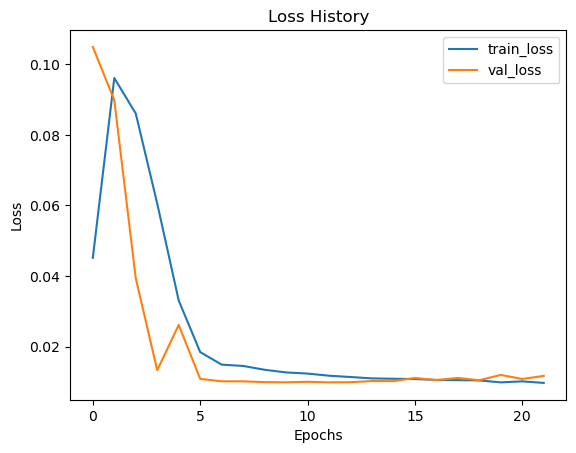

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

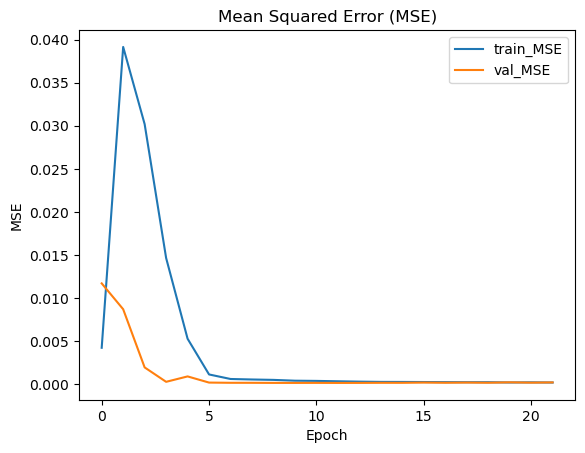

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

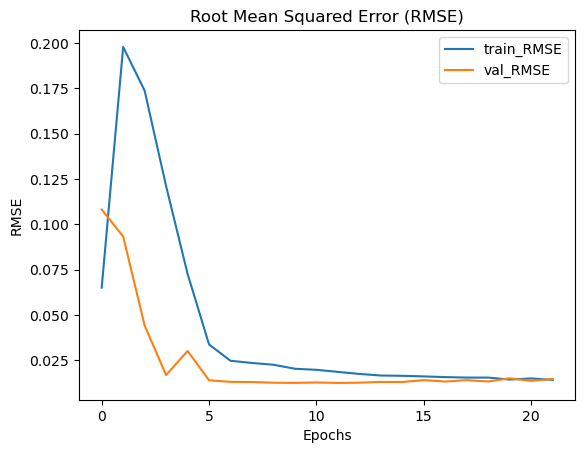

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

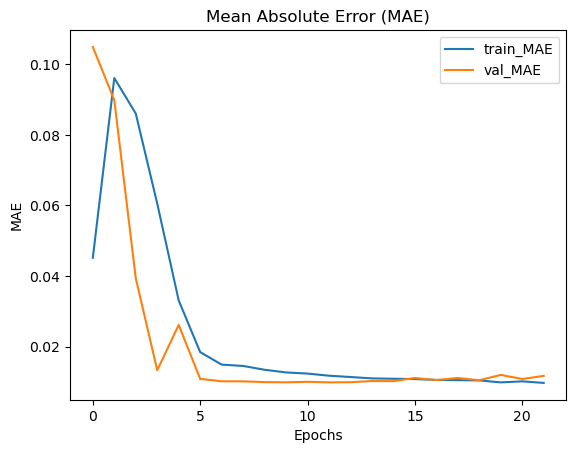

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

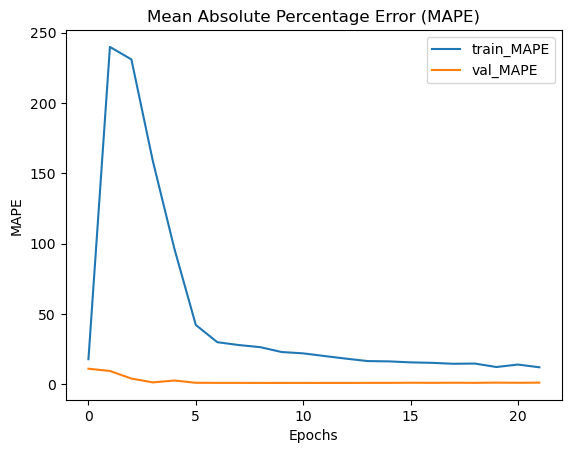

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:45:31.813304: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


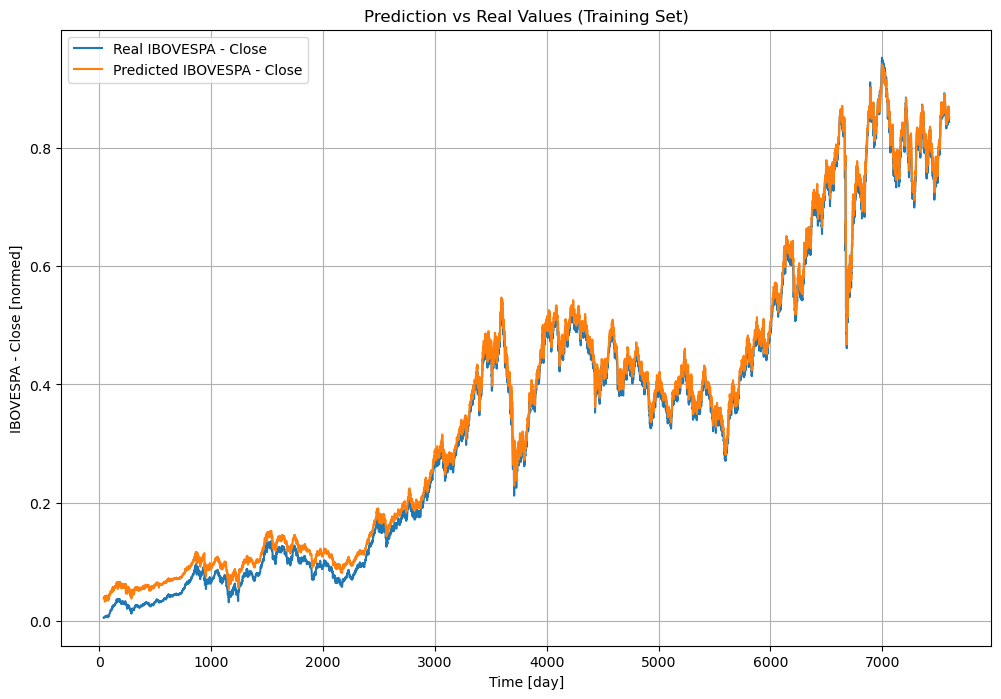

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


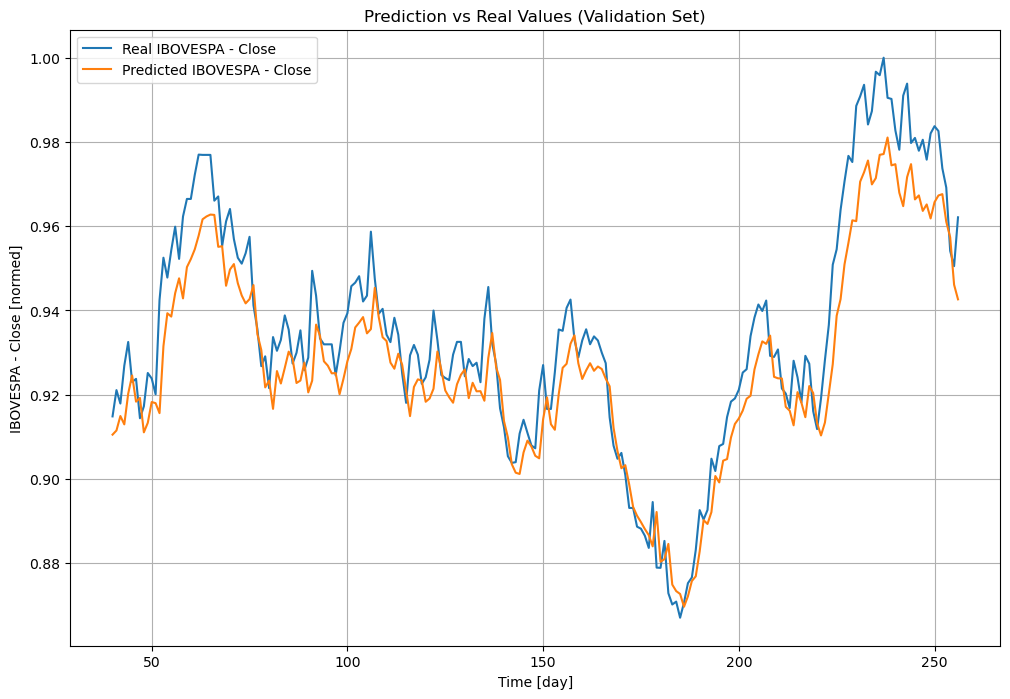

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


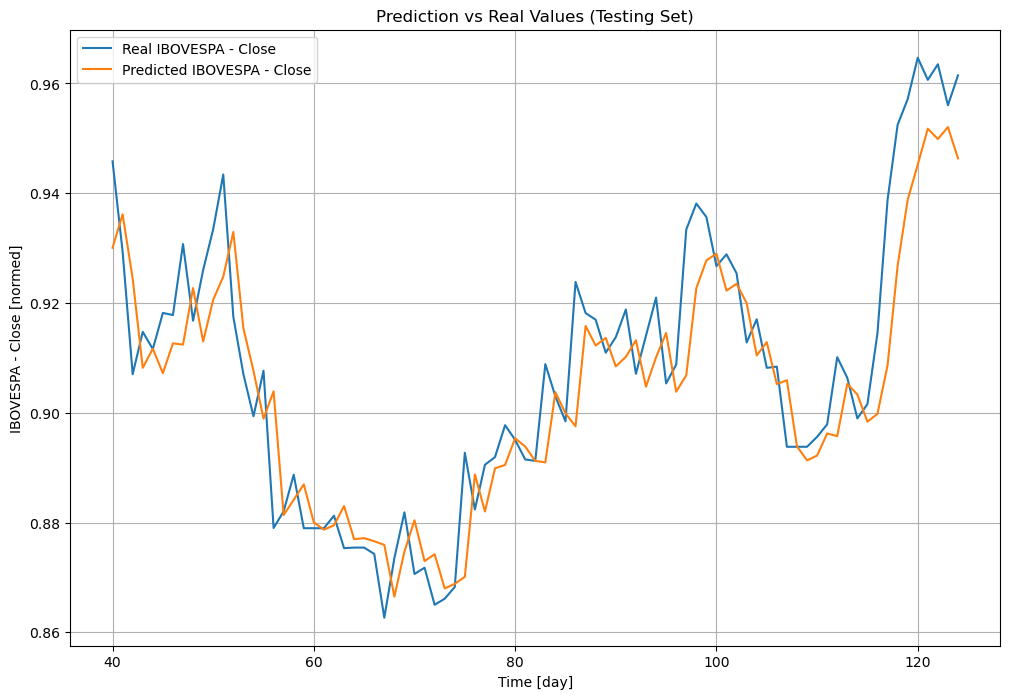

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

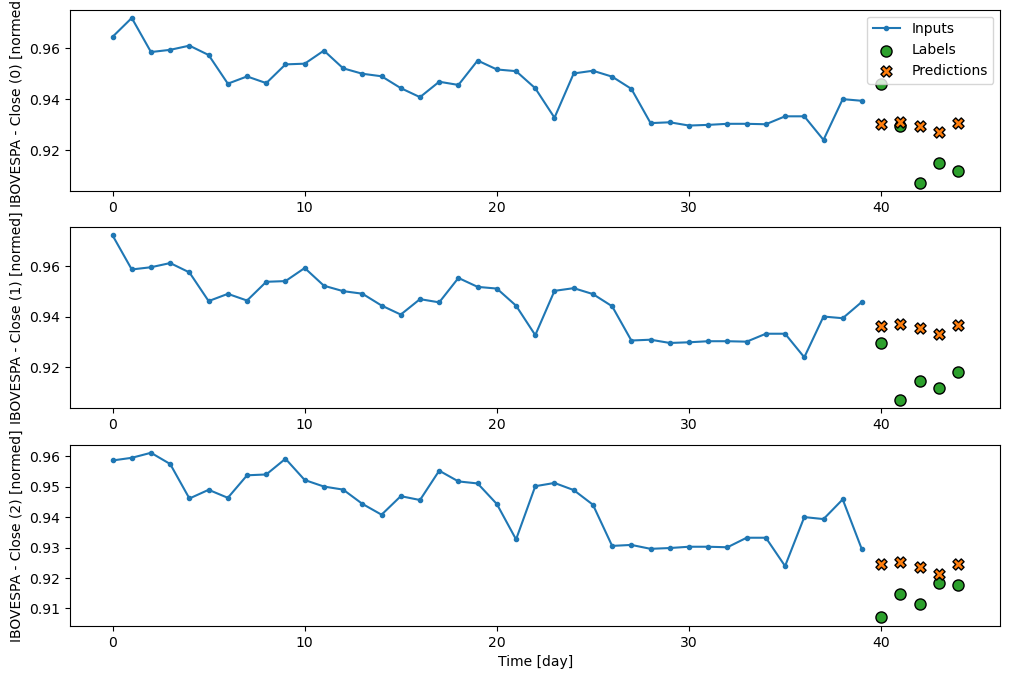

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:41s:124ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[[0.93006074, 0.93006074, 0.93006074, ..., 0.93006074,
         0.93006074, 0.93006074],
        [0.9310848 , 0.9310848 , 0.9310848 , ..., 0.9310848 ,
         0.9310848 , 0.9310848 ],
        [0.92935723, 0.92935723, 0.92935723, ..., 0.92935723,
         0.92935723, 0.92935723],
        [0.92714787, 0.92714787, 0.92714787, ..., 0.92714787,
         0.92714787, 0.92714787],
        [0.9305374 , 0.9305374 , 0.9305374 , ..., 0.9305374 ,
         0.93035   , 0.93035   ]],

       [[0.93616736, 0.93616736, 0.93616736, ..., 0.93616736,
         0.93616736, 0.93616736],
        [0.93724185, 0.93724185, 0.93724185, ..., 0.93724185,
         0.93724185, 0.93724185],
        [0.9355122 , 0.9355122 , 0.9355122 , ..., 0.9355122 ,
         0.9355122 , 0.9355122 ],
        [0.9331844 , 0.9331844 , 0.9331844 , ..., 0.9331844 ,
         0.9331844 , 0.9331844 ],
        [0.93658864, 0.93658864, 0.93658864, ..., 0.93658864,
         0.9363968 , 0.9363968 ]],

       [[0.9244395 , 0.9244395 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')